In [19]:
#install packages
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import ranksums

In [8]:
infl_mod_df = pd.read_csv("influence_mod_with_metrics_laptop.csv")
org_mod_df = pd.read_csv("org_mod_with_metrics_laptop.csv")

# Test 1: Global Kruskal-Wallis (All runs)

## First, run global, then for each org-strat/org-cap combo
### What do we see?

In [14]:
#Total runs

infl_mod_peaks = infl_mod_df['peak-time'].to_numpy()
org_mod_peaks = org_mod_df['peak-time'].to_numpy()

stats.kruskal(infl_mod_peaks, org_mod_peaks)
#Note: are these really independent trials??? sort of?

KruskalResult(statistic=660.7608824142045, pvalue=1.020611737066442e-145)

In [18]:
# let's break town per org strat/org mod combo

org_strat_list = ['neighbors-of-neighbors', "high-degree-citizens", "high-degree-media", "high-degree-cit-and-media"]
org_cap_list = [1,5]

for i in range(0, len(org_strat_list)):
    org_mod_strat = org_mod_df.loc[org_mod_df["flint-organizing-strategy"] == org_strat_list[i]]
    for j in range(0, len(org_cap_list)):
        org_mod_cap = org_mod_strat.loc[org_mod_strat['organizing-capacity'] == org_cap_list[j]]
        infl_mod_peaks = infl_mod_df['peak-time'].to_numpy()
        org_mod_peaks = org_mod_cap['peak-time'].to_numpy()
        print(org_strat_list[i], org_cap_list[j])
        print(stats.kruskal(infl_mod_peaks, org_mod_peaks))
#we won't break down the other parameters yet- let's see how we do on these 8 tests

neighbors-of-neighbors 1
KruskalResult(statistic=59.3494045022673, pvalue=1.3202012921332312e-14)
neighbors-of-neighbors 5
KruskalResult(statistic=170.44757660170072, pvalue=5.907612871765762e-39)
high-degree-citizens 1
KruskalResult(statistic=168.509063354346, pvalue=1.5660662558245732e-38)
high-degree-citizens 5
KruskalResult(statistic=298.5937811800566, pvalue=6.670239822881502e-67)
high-degree-media 1
KruskalResult(statistic=115.30774981137318, pvalue=6.738497216470113e-27)
high-degree-media 5
KruskalResult(statistic=281.7793422277938, pvalue=3.075041260928089e-63)
high-degree-cit-and-media 1
KruskalResult(statistic=128.40287942535943, pvalue=9.16226517646946e-30)
high-degree-cit-and-media 5
KruskalResult(statistic=295.45596167191025, pvalue=3.21950500869596e-66)


## UPDATE: Moving to Wilcoxon tests because it appears that Kruskal- Wallis is designed for 2 groups

In [20]:

infl_mod_peaks = infl_mod_df['peak-time'].to_numpy()
org_mod_peaks = org_mod_df['peak-time'].to_numpy()

print(ranksums(infl_mod_peaks, org_mod_peaks))
#Note: are these really independent trials??? sort of?

RanksumsResult(statistic=25.698483640914542, pvalue=1.21540323938797e-145)


In [21]:

org_strat_list = ['neighbors-of-neighbors', "high-degree-citizens", "high-degree-media", "high-degree-cit-and-media"]
org_cap_list = [1,5]

for i in range(0, len(org_strat_list)):
    org_mod_strat = org_mod_df.loc[org_mod_df["flint-organizing-strategy"] == org_strat_list[i]]
    for j in range(0, len(org_cap_list)):
        org_mod_cap = org_mod_strat.loc[org_mod_strat['organizing-capacity'] == org_cap_list[j]]
        infl_mod_peaks = infl_mod_df['peak-time'].to_numpy()
        org_mod_peaks = org_mod_cap['peak-time'].to_numpy()
        print(org_strat_list[i], org_cap_list[j])
        print(ranksums(infl_mod_peaks, org_mod_peaks))
#we won't break down the other parameters yet- let's see how we do on these 8 tests

neighbors-of-neighbors 1
RanksumsResult(statistic=7.7019887024107625, pvalue=1.3396473404887347e-14)
neighbors-of-neighbors 5
RanksumsResult(statistic=13.052291505085437, pvalue=6.166433886348462e-39)
high-degree-citizens 1
RanksumsResult(statistic=12.977925112728578, pvalue=1.632431407772714e-38)
high-degree-citizens 5
RanksumsResult(statistic=17.27546385740577, pvalue=7.199227940110784e-67)
high-degree-media 1
RanksumsResult(statistic=10.735541055928563, pvalue=6.931175421071367e-27)
high-degree-media 5
RanksumsResult(statistic=16.782089528328253, pvalue=3.300167246981936e-63)
high-degree-cit-and-media 1
RanksumsResult(statistic=11.328736349132573, pvalue=9.455907969483027e-30)
high-degree-cit-and-media 5
RanksumsResult(statistic=17.184491104897788, pvalue=3.4697831918155465e-66)


In [30]:
org_strat_list = ['neighbors-of-neighbors', "high-degree-citizens", "high-degree-media", "high-degree-cit-and-media"]
org_cap_list = [1,5]
p_list =[0.01, 0.05, 0.1, 0.25, 0.5, 0.75]
cit_cit_list = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75]
cit_media_list = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75]
ba_m_list = [3, 10]
total_scen = 0

for i in range(0, len(org_strat_list)):
    org_mod_strat = org_mod_df.loc[org_mod_df["flint-organizing-strategy"] == org_strat_list[i]]
    for j in range(0, len(org_cap_list)):
        org_mod_cap = org_mod_strat.loc[org_mod_strat['organizing-capacity'] == org_cap_list[j]]
        for k in range(0, len(p_list)):
            org_mod_p = org_mod_cap.loc[org_mod_cap["simple-spread-chance"] == p_list[k]]
            infl_mod_p = infl_mod_df.loc[infl_mod_df["simple-spread-chance"] == p_list[k]]
            for l in range(0, len(cit_cit_list)):
                org_mod_cc= org_mod_p.loc[org_mod_p["citizen-citizen-influence"] == cit_cit_list[l]]
                infl_mod_cc = infl_mod_p.loc[infl_mod_p["citizen-citizen-influence"] == cit_cit_list[l]]
                for m in range(0, len(cit_media_list)):
                    org_mod_cm= org_mod_cc.loc[org_mod_cc["citizen-media-influence"] == cit_media_list[m]]
                    infl_mod_cm = infl_mod_cc.loc[infl_mod_cc["citizen-media-influence"] == cit_media_list[m]]
                    for n in range(0, len(ba_m_list)):
                        org_mod_b= org_mod_cm.loc[org_mod_cm["ba-m"] == ba_m_list[n]]
                        infl_mod_b = infl_mod_cm.loc[infl_mod_cm["ba-m"] == ba_m_list[n]]
                        
                        infl_mod_peaks = infl_mod_b['peak-time'].to_numpy()
                        org_mod_peaks = org_mod_b['peak-time'].to_numpy()
                        print(org_strat_list[i], org_cap_list[j], p_list[k], cit_cit_list[l], cit_media_list[m], ba_m_list[n])
                        print(ranksums(infl_mod_peaks, org_mod_peaks))
                        total_scen = total_scen + 1
                        
print("total_Scen", total_scen)
        
        
        
        
 

neighbors-of-neighbors 1 0.01 0.01 0.01 3
RanksumsResult(statistic=7.551962412507515, pvalue=4.2874823941872747e-14)
neighbors-of-neighbors 1 0.01 0.01 0.01 10
RanksumsResult(statistic=8.114281341825102, pvalue=4.886680715344223e-16)
neighbors-of-neighbors 1 0.01 0.01 0.05 3
RanksumsResult(statistic=6.617323099955759, pvalue=3.657614988848676e-11)
neighbors-of-neighbors 1 0.01 0.01 0.05 10
RanksumsResult(statistic=5.172182643381894, pvalue=2.3137525542198082e-07)
neighbors-of-neighbors 1 0.01 0.01 0.1 3
RanksumsResult(statistic=6.049246638938675, pvalue=1.4552472721064642e-09)
neighbors-of-neighbors 1 0.01 0.01 0.1 10
RanksumsResult(statistic=5.26762656559869, pvalue=1.3819887665151723e-07)
neighbors-of-neighbors 1 0.01 0.01 0.25 3
RanksumsResult(statistic=3.009269901604011, pvalue=0.002618763601192218)
neighbors-of-neighbors 1 0.01 0.01 0.25 10
RanksumsResult(statistic=5.759450876730636, pvalue=8.438801309091621e-09)
neighbors-of-neighbors 1 0.01 0.01 0.5 3
RanksumsResult(statistic=0.

RanksumsResult(statistic=-1.1342337448010016, pvalue=0.2566965126668186)
neighbors-of-neighbors 1 0.05 0.05 0.01 10
RanksumsResult(statistic=-1.4604938744391915, pvalue=0.14415438982860032)
neighbors-of-neighbors 1 0.05 0.05 0.05 3
RanksumsResult(statistic=1.2205967202934638, pvalue=0.22223874873102079)
neighbors-of-neighbors 1 0.05 0.05 0.05 10
RanksumsResult(statistic=0.6966613356391939, pvalue=0.4860147610388904)
neighbors-of-neighbors 1 0.05 0.05 0.1 3
RanksumsResult(statistic=-1.999782676958788, pvalue=0.04552373595890541)
neighbors-of-neighbors 1 0.05 0.05 0.1 10
RanksumsResult(statistic=1.663926661154769, pvalue=0.09612708630458668)
neighbors-of-neighbors 1 0.05 0.05 0.25 3
RanksumsResult(statistic=0.6870654494733648, pvalue=0.4920414854783316)
neighbors-of-neighbors 1 0.05 0.05 0.25 10
RanksumsResult(statistic=0.13434240632160763, pvalue=0.893131821752615)
neighbors-of-neighbors 1 0.05 0.05 0.5 3
RanksumsResult(statistic=-0.6717120316080382, pvalue=0.5017670403101799)
neighbors

neighbors-of-neighbors 1 0.1 0.1 0.01 3
RanksumsResult(statistic=-0.6774695633075357, pvalue=0.49810807508836663)
neighbors-of-neighbors 1 0.1 0.1 0.01 10
RanksumsResult(statistic=-0.47787513105829005, pvalue=0.6327390827335031)
neighbors-of-neighbors 1 0.1 0.1 0.05 3
RanksumsResult(statistic=0.07484791209346711, pvalue=0.9403357203629744)
neighbors-of-neighbors 1 0.1 0.1 0.05 10
RanksumsResult(statistic=1.0407810552997412, pvalue=0.2979771744262667)
neighbors-of-neighbors 1 0.1 0.1 0.1 3
RanksumsResult(statistic=2.122610019881401, pvalue=0.03378654462505419)
neighbors-of-neighbors 1 0.1 0.1 0.1 10
RanksumsResult(statistic=-1.184132352863313, pvalue=0.2363606750121815)
neighbors-of-neighbors 1 0.1 0.1 0.25 3
RanksumsResult(statistic=1.0497899465417053, pvalue=0.2938146984792791)
neighbors-of-neighbors 1 0.1 0.1 0.25 10
RanksumsResult(statistic=-1.4508979882733626, pvalue=0.14680826818487328)
neighbors-of-neighbors 1 0.1 0.1 0.5 3
RanksumsResult(statistic=-0.14182914569305044, pvalue=0.

RanksumsResult(statistic=3.964236561280832, pvalue=7.363120869182923e-05)
neighbors-of-neighbors 1 0.25 0.25 0.01 10
RanksumsResult(statistic=-2.1993771092080334, pvalue=0.027851118912999705)
neighbors-of-neighbors 1 0.25 0.25 0.05 3
RanksumsResult(statistic=2.815433001054263, pvalue=0.004871155274192742)
neighbors-of-neighbors 1 0.25 0.25 0.05 10
RanksumsResult(statistic=2.1110949564824057, pvalue=0.03476415086291657)
neighbors-of-neighbors 1 0.25 0.25 0.1 3
RanksumsResult(statistic=-1.8289759032070296, pvalue=0.0674032181768864)
neighbors-of-neighbors 1 0.25 0.25 0.1 10
RanksumsResult(statistic=0.34929025643617984, pvalue=0.7268714126094481)
neighbors-of-neighbors 1 0.25 0.25 0.25 3
RanksumsResult(statistic=-1.773319763445221, pvalue=0.0761757359999075)
neighbors-of-neighbors 1 0.25 0.25 0.25 10
RanksumsResult(statistic=3.826839402932652, pvalue=0.0001297991377703989)
neighbors-of-neighbors 1 0.25 0.25 0.5 3
RanksumsResult(statistic=0.6655162487833306, pvalue=0.505720354251779)
neigh

neighbors-of-neighbors 1 0.5 0.5 0.1 3
RanksumsResult(statistic=2.863596113190197, pvalue=0.00418861716924164)
neighbors-of-neighbors 1 0.5 0.5 0.1 10
RanksumsResult(statistic=1.2090816568944687, pvalue=0.22663147559684438)
neighbors-of-neighbors 1 0.5 0.5 0.25 3
RanksumsResult(statistic=-0.7542366526341686, pvalue=0.4507071325759193)
neighbors-of-neighbors 1 0.5 0.5 0.25 10
RanksumsResult(statistic=-1.8539252072381853, pvalue=0.06374986103542868)
neighbors-of-neighbors 1 0.5 0.5 0.5 3
RanksumsResult(statistic=2.4642235673849173, pvalue=0.013731043454147733)
neighbors-of-neighbors 1 0.5 0.5 0.5 10
RanksumsResult(statistic=-1.7541279911135625, pvalue=0.07940857838118887)
neighbors-of-neighbors 1 0.5 0.5 0.75 3
RanksumsResult(statistic=-0.24373550861205956, pvalue=0.8074356706537857)
neighbors-of-neighbors 1 0.5 0.5 0.75 10
RanksumsResult(statistic=3.2357328151175784, pvalue=0.0012133089565009676)
neighbors-of-neighbors 1 0.5 0.75 0.01 3
RanksumsResult(statistic=3.063006864132654, pvalue

neighbors-of-neighbors 1 0.75 0.75 0.1 10
RanksumsResult(statistic=2.3164469204311486, pvalue=0.020533879411077833)
neighbors-of-neighbors 1 0.75 0.75 0.25 3
RanksumsResult(statistic=0.05792844463634923, pvalue=0.953805625616874)
neighbors-of-neighbors 1 0.75 0.75 0.25 10
RanksumsResult(statistic=4.055221493679385, pvalue=5.008681861575704e-05)
neighbors-of-neighbors 1 0.75 0.75 0.5 3
RanksumsResult(statistic=1.6754417245537638, pvalue=0.09384759589834961)
neighbors-of-neighbors 1 0.75 0.75 0.5 10
RanksumsResult(statistic=0.7638325387999977, pvalue=0.4449670434085755)
neighbors-of-neighbors 1 0.75 0.75 0.75 3
RanksumsResult(statistic=0.3379159270453705, pvalue=0.7354265448017584)
neighbors-of-neighbors 1 0.75 0.75 0.75 10
RanksumsResult(statistic=-2.088064829684416, pvalue=0.03679198707648842)
neighbors-of-neighbors 5 0.01 0.01 0.01 3
RanksumsResult(statistic=5.5233920770512395, pvalue=3.325165724079631e-08)
neighbors-of-neighbors 5 0.01 0.01 0.01 10
RanksumsResult(statistic=7.78034450

neighbors-of-neighbors 5 0.05 0.01 0.1 3
RanksumsResult(statistic=-0.8636297549246206, pvalue=0.3877913131813021)
neighbors-of-neighbors 5 0.05 0.01 0.1 10
RanksumsResult(statistic=2.0266511582231095, pvalue=0.04269810073452969)
neighbors-of-neighbors 5 0.05 0.01 0.25 3
RanksumsResult(statistic=-0.8386804508934649, pvalue=0.40164865134320393)
neighbors-of-neighbors 5 0.05 0.01 0.25 10
RanksumsResult(statistic=1.6121088758592916, pvalue=0.10693824962627325)
neighbors-of-neighbors 5 0.05 0.01 0.5 3
RanksumsResult(statistic=-0.8708576176997834, pvalue=0.38383190054771144)
neighbors-of-neighbors 5 0.05 0.01 0.5 10
RanksumsResult(statistic=0.673900905936196, pvalue=0.5003743161284118)
neighbors-of-neighbors 5 0.05 0.01 0.75 3
RanksumsResult(statistic=-0.2955532939075368, pvalue=0.7675712468612716)
neighbors-of-neighbors 5 0.05 0.01 0.75 10
RanksumsResult(statistic=0.9365584897849218, pvalue=0.34898571281040014)
neighbors-of-neighbors 5 0.05 0.05 0.01 3
RanksumsResult(statistic=0.34929025643

RanksumsResult(statistic=0.3185834207055267, pvalue=0.7500424272133137)
neighbors-of-neighbors 5 0.1 0.05 0.1 10
RanksumsResult(statistic=-0.4855518399909533, pvalue=0.6272849492883783)
neighbors-of-neighbors 5 0.1 0.05 0.25 3
RanksumsResult(statistic=1.3280706453507498, pvalue=0.18415476986914625)
neighbors-of-neighbors 5 0.1 0.05 0.25 10
RanksumsResult(statistic=0.738883234768842, pvalue=0.45997790347151124)
neighbors-of-neighbors 5 0.1 0.05 0.5 3
RanksumsResult(statistic=0.6832270950070332, pvalue=0.49446335401501396)
neighbors-of-neighbors 5 0.1 0.05 0.5 10
RanksumsResult(statistic=-0.5617740100023997, pvalue=0.5742700019057735)
neighbors-of-neighbors 5 0.1 0.05 0.75 3
RanksumsResult(statistic=1.9095813469999943, pvalue=0.05618713867980016)
neighbors-of-neighbors 5 0.1 0.05 0.75 10
RanksumsResult(statistic=1.6600883066884373, pvalue=0.09689668893727973)
neighbors-of-neighbors 5 0.1 0.1 0.01 3
RanksumsResult(statistic=-0.3185834207055267, pvalue=0.7500424272133137)
neighbors-of-neig

neighbors-of-neighbors 5 0.25 0.1 0.25 3
RanksumsResult(statistic=1.0670625416401978, pvalue=0.28594359526499624)
neighbors-of-neighbors 5 0.25 0.1 0.25 10
RanksumsResult(statistic=0.5580440166634976, pvalue=0.5768143275589764)
neighbors-of-neighbors 5 0.25 0.1 0.5 3
RanksumsResult(statistic=-0.34950161597264034, pvalue=0.7267127578474624)
neighbors-of-neighbors 5 0.25 0.1 0.5 10
RanksumsResult(statistic=0.08252462102613041, pvalue=0.9342295403590714)
neighbors-of-neighbors 5 0.25 0.1 0.75 3
RanksumsResult(statistic=2.2568830436681773, pvalue=0.0240153838433709)
neighbors-of-neighbors 5 0.25 0.1 0.75 10
RanksumsResult(statistic=-1.2321117836924587, pvalue=0.21790733019478703)
neighbors-of-neighbors 5 0.25 0.25 0.01 3
RanksumsResult(statistic=5.717537485607669, pvalue=1.0807883820201277e-08)
neighbors-of-neighbors 5 0.25 0.25 0.01 10
RanksumsResult(statistic=1.4297870387085385, pvalue=0.15277815020964536)
neighbors-of-neighbors 5 0.25 0.25 0.05 3
RanksumsResult(statistic=5.2969291635376

neighbors-of-neighbors 5 0.5 0.25 0.75 3
RanksumsResult(statistic=1.554533558864317, pvalue=0.12005719820843133)
neighbors-of-neighbors 5 0.5 0.25 0.75 10
RanksumsResult(statistic=-1.6600883066884373, pvalue=0.09689668893727973)
neighbors-of-neighbors 5 0.5 0.5 0.01 3
RanksumsResult(statistic=3.586942248786924, pvalue=0.000334578387511392)
neighbors-of-neighbors 5 0.5 0.5 0.01 10
RanksumsResult(statistic=1.9748333729276324, pvalue=0.048287060430548534)
neighbors-of-neighbors 5 0.5 0.5 0.05 3
RanksumsResult(statistic=2.3126085659648172, pvalue=0.020744170143706622)
neighbors-of-neighbors 5 0.5 0.5 0.05 10
RanksumsResult(statistic=1.5506952043979854, pvalue=0.12097474431734569)
neighbors-of-neighbors 5 0.5 0.5 0.1 3
RanksumsResult(statistic=2.7322916386811387, pvalue=0.006289543992717049)
neighbors-of-neighbors 5 0.5 0.5 0.1 10
RanksumsResult(statistic=2.815433001054263, pvalue=0.004871155274192742)
neighbors-of-neighbors 5 0.5 0.5 0.25 3
RanksumsResult(statistic=-1.021002288044218, pval

neighbors-of-neighbors 5 0.75 0.75 0.01 3
RanksumsResult(statistic=-0.003838354466331647, pvalue=0.9969374437525161)
neighbors-of-neighbors 5 0.75 0.75 0.01 10
RanksumsResult(statistic=5.964802840679379, pvalue=2.449296033655219e-09)
neighbors-of-neighbors 5 0.75 0.75 0.05 3
RanksumsResult(statistic=1.7272595098492411, pvalue=0.08412106747869064)
neighbors-of-neighbors 5 0.75 0.75 0.05 10
RanksumsResult(statistic=3.544720349657276, pvalue=0.00039302983641193275)
neighbors-of-neighbors 5 0.75 0.75 0.1 3
RanksumsResult(statistic=2.6043235054060223, pvalue=0.009205582007925239)
neighbors-of-neighbors 5 0.75 0.75 0.1 10
RanksumsResult(statistic=3.5272361185516523, pvalue=0.0004199221041118306)
neighbors-of-neighbors 5 0.75 0.75 0.25 3
RanksumsResult(statistic=1.5911012793450587, pvalue=0.11158678466893003)
neighbors-of-neighbors 5 0.75 0.75 0.25 10
RanksumsResult(statistic=4.007242062850239, pvalue=6.143189350880476e-05)
neighbors-of-neighbors 5 0.75 0.75 0.5 3
RanksumsResult(statistic=1.2

high-degree-citizens 1 0.01 0.75 0.25 10
RanksumsResult(statistic=-0.5117012609544181, pvalue=0.6088601034901006)
high-degree-citizens 1 0.01 0.75 0.5 3
RanksumsResult(statistic=-0.1573725331195975, pvalue=0.8749512591028442)
high-degree-citizens 1 0.01 0.75 0.5 10
RanksumsResult(statistic=1.4182719753095434, pvalue=0.1561113753526265)
high-degree-citizens 1 0.01 0.75 0.75 3
RanksumsResult(statistic=0.9058516540542686, pvalue=0.3650143764836147)
high-degree-citizens 1 0.01 0.75 0.75 10
RanksumsResult(statistic=3.7807791493366723, pvalue=0.0001563383151876474)
high-degree-citizens 1 0.05 0.01 0.01 3
RanksumsResult(statistic=5.966722017912545, pvalue=2.420672887941382e-09)
high-degree-citizens 1 0.05 0.01 0.01 10
RanksumsResult(statistic=6.306416388182896, pvalue=2.855701332714001e-10)
high-degree-citizens 1 0.05 0.01 0.05 3
RanksumsResult(statistic=2.6561412907014996, pvalue=0.007904049040251309)
high-degree-citizens 1 0.05 0.01 0.05 10
RanksumsResult(statistic=3.2671642774900964, pvalu

high-degree-citizens 1 0.1 0.01 0.5 3
RanksumsResult(statistic=0.606317720527122, pvalue=0.5443037936427316)
high-degree-citizens 1 0.1 0.01 0.5 10
RanksumsResult(statistic=2.5716974924422034, pvalue=0.010120127628456552)
high-degree-citizens 1 0.1 0.01 0.75 3
RanksumsResult(statistic=0.3704012060010039, pvalue=0.7110835753511068)
high-degree-citizens 1 0.1 0.01 0.75 10
RanksumsResult(statistic=0.5834298788824103, pvalue=0.5596039486955049)
high-degree-citizens 1 0.1 0.05 0.01 3
RanksumsResult(statistic=-1.95756077782914, pvalue=0.050281573510231915)
high-degree-citizens 1 0.1 0.05 0.01 10
RanksumsResult(statistic=-0.12666569738894434, pvalue=0.89920499662059)
high-degree-citizens 1 0.1 0.05 0.05 3
RanksumsResult(statistic=-0.2648464581768836, pvalue=0.7911277459294537)
high-degree-citizens 1 0.1 0.05 0.05 10
RanksumsResult(statistic=0.6889846267065306, pvalue=0.49083294198525484)
high-degree-citizens 1 0.1 0.05 0.1 3
RanksumsResult(statistic=0.7120147535045205, pvalue=0.47645564011806

high-degree-citizens 1 0.25 0.1 0.01 3
RanksumsResult(statistic=0.5527230431517571, pvalue=0.5804530719565921)
high-degree-citizens 1 0.25 0.1 0.01 10
RanksumsResult(statistic=-0.12666569738894434, pvalue=0.89920499662059)
high-degree-citizens 1 0.25 0.1 0.05 3
RanksumsResult(statistic=-0.07868626655979875, pvalue=0.9372821693056437)
high-degree-citizens 1 0.25 0.1 0.05 10
RanksumsResult(statistic=0.41646145959698366, pvalue=0.6770723635892463)
high-degree-citizens 1 0.25 0.1 0.1 3
RanksumsResult(statistic=1.7253403326160752, pvalue=0.08446615742293305)
high-degree-citizens 1 0.25 0.1 0.1 10
RanksumsResult(statistic=-0.7120147535045205, pvalue=0.4764556401180601)
high-degree-citizens 1 0.25 0.1 0.25 3
RanksumsResult(statistic=0.5162586757216066, pvalue=0.605673754218827)
high-degree-citizens 1 0.25 0.1 0.25 10
RanksumsResult(statistic=1.6992343759995774, pvalue=0.0892750317258792)
high-degree-citizens 1 0.25 0.1 0.5 3
RanksumsResult(statistic=0.903683736327048, pvalue=0.366163125403989

high-degree-citizens 1 0.5 0.25 0.05 3
RanksumsResult(statistic=1.0190831108110523, pvalue=0.3081635115347551)
high-degree-citizens 1 0.5 0.25 0.05 10
RanksumsResult(statistic=3.9976461766844102, pvalue=6.397548375916078e-05)
high-degree-citizens 1 0.5 0.25 0.1 3
RanksumsResult(statistic=-0.5738339927165812, pvalue=0.5660801435165529)
high-degree-citizens 1 0.5 0.25 0.1 10
RanksumsResult(statistic=-0.9250434263859268, pvalue=0.3549433188931054)
high-degree-citizens 1 0.5 0.25 0.25 3
RanksumsResult(statistic=2.7904836970231073, pvalue=0.005262935064035202)
high-degree-citizens 1 0.5 0.25 0.25 10
RanksumsResult(statistic=1.1476679854331624, pvalue=0.25110565224385384)
high-degree-citizens 1 0.5 0.25 0.5 3
RanksumsResult(statistic=1.4037993083541964, pvalue=0.16037862000273062)
high-degree-citizens 1 0.5 0.25 0.5 10
RanksumsResult(statistic=-1.5468568499316537, pvalue=0.12189776804767305)
high-degree-citizens 1 0.5 0.25 0.75 3
RanksumsResult(statistic=0.7004996901055256, pvalue=0.48361529

high-degree-citizens 1 0.75 0.5 0.25 10
RanksumsResult(statistic=-1.6351390026572816, pvalue=0.10201991159221238)
high-degree-citizens 1 0.75 0.5 0.5 3
RanksumsResult(statistic=-0.5368035869635028, pvalue=0.5914032937114075)
high-degree-citizens 1 0.75 0.5 0.5 10
RanksumsResult(statistic=2.042004576088436, pvalue=0.041151077409820234)
high-degree-citizens 1 0.75 0.5 0.75 3
RanksumsResult(statistic=-1.0939310229045194, pvalue=0.27398523143851305)
high-degree-citizens 1 0.75 0.5 0.75 10
RanksumsResult(statistic=0.15254490420905298, pvalue=0.8787571763872237)
high-degree-citizens 1 0.75 0.75 0.01 3
RanksumsResult(statistic=-0.05181778529547723, pvalue=0.9586738839725164)
high-degree-citizens 1 0.75 0.75 0.01 10
RanksumsResult(statistic=2.4507893267527563, pvalue=0.014254335425760026)
high-degree-citizens 1 0.75 0.75 0.05 3
RanksumsResult(statistic=1.1611022260653232, pvalue=0.24560032958102207)
high-degree-citizens 1 0.75 0.75 0.05 10
RanksumsResult(statistic=0.7465599437015054, pvalue=0.

high-degree-citizens 5 0.01 0.75 0.5 3
RanksumsResult(statistic=1.186051530096479, pvalue=0.23560195023188657)
high-degree-citizens 5 0.01 0.75 0.5 10
RanksumsResult(statistic=5.043597768759784, pvalue=4.5685916271673456e-07)
high-degree-citizens 5 0.01 0.75 0.75 3
RanksumsResult(statistic=5.316120935869331, pvalue=1.0600271122603369e-07)
high-degree-citizens 5 0.01 0.75 0.75 10
RanksumsResult(statistic=5.078142958956769, pvalue=3.8114187084232693e-07)
high-degree-citizens 5 0.05 0.01 0.01 3
RanksumsResult(statistic=3.5178518683929543, pvalue=0.00043505514456392306)
high-degree-citizens 5 0.05 0.01 0.01 10
RanksumsResult(statistic=6.513687529364804, pvalue=7.332795723684044e-11)
high-degree-citizens 5 0.05 0.01 0.05 3
RanksumsResult(statistic=2.886442558681398, pvalue=0.0038962386123109734)
high-degree-citizens 5 0.05 0.01 0.05 10
RanksumsResult(statistic=3.8020369162990546, pvalue=0.00014351133683637057)
high-degree-citizens 5 0.05 0.01 0.1 3
RanksumsResult(statistic=0.963426971049243

high-degree-citizens 5 0.1 0.01 0.75 3
RanksumsResult(statistic=-0.8214078557949724, pvalue=0.41141399034618387)
high-degree-citizens 5 0.1 0.01 0.75 10
RanksumsResult(statistic=1.5852403945949702, pvalue=0.1129117258884866)
high-degree-citizens 5 0.1 0.05 0.01 3
RanksumsResult(statistic=-1.6600883066884373, pvalue=0.09689668893727973)
high-degree-citizens 5 0.1 0.05 0.01 10
RanksumsResult(statistic=-1.6370581798904473, pvalue=0.1016183136464239)
high-degree-citizens 5 0.1 0.05 0.05 3
RanksumsResult(statistic=0.2590889264773862, pvalue=0.7955666285533602)
high-degree-citizens 5 0.1 0.05 0.05 10
RanksumsResult(statistic=-0.38767380109949634, pvalue=0.6982574461378661)
high-degree-citizens 5 0.1 0.05 0.1 3
RanksumsResult(statistic=1.260899442189946, pvalue=0.20734507920745437)
high-degree-citizens 5 0.1 0.05 0.1 10
RanksumsResult(statistic=1.1016077318371826, pvalue=0.2706322454826603)
high-degree-citizens 5 0.1 0.05 0.25 3
RanksumsResult(statistic=0.7100955762713547, pvalue=0.4776448693

RanksumsResult(statistic=1.9191772331658234, pvalue=0.054961907774182334)
high-degree-citizens 5 0.25 0.1 0.05 3
RanksumsResult(statistic=1.4585746972060258, pvalue=0.14468220201025014)
high-degree-citizens 5 0.25 0.1 0.05 10
RanksumsResult(statistic=1.6888759651859246, pvalue=0.09124320211532533)
high-degree-citizens 5 0.25 0.1 0.1 3
RanksumsResult(statistic=2.926745280577881, pvalue=0.003425292898807845)
high-degree-citizens 5 0.25 0.1 0.1 10
RanksumsResult(statistic=-1.7694814089788893, pvalue=0.07681357057986288)
high-degree-citizens 5 0.25 0.1 0.25 3
RanksumsResult(statistic=1.5391801409989905, pvalue=0.12376032440614516)
high-degree-citizens 5 0.25 0.1 0.25 10
RanksumsResult(statistic=1.8286079023540907, pvalue=0.06745836802571947)
high-degree-citizens 5 0.25 0.1 0.5 3
RanksumsResult(statistic=-1.212635441054244, pvalue=0.22526923250121256)
high-degree-citizens 5 0.25 0.1 0.5 10
RanksumsResult(statistic=1.6121088758592916, pvalue=0.10693824962627325)
high-degree-citizens 5 0.25 0

high-degree-citizens 5 0.5 0.25 0.5 3
RanksumsResult(statistic=2.98524584692653, pvalue=0.0028335049181692174)
high-degree-citizens 5 0.5 0.25 0.5 10
RanksumsResult(statistic=-1.4201911525427093, pvalue=0.1555520386982916)
high-degree-citizens 5 0.5 0.25 0.75 3
RanksumsResult(statistic=0.5181778529547724, pvalue=0.6043341854628569)
high-degree-citizens 5 0.5 0.25 0.75 10
RanksumsResult(statistic=-1.1879707073296446, pvalue=0.23484495052901078)
high-degree-citizens 5 0.5 0.5 0.01 3
RanksumsResult(statistic=5.1529908710502355, pvalue=2.563644496008122e-07)
high-degree-citizens 5 0.5 0.5 0.01 10
RanksumsResult(statistic=4.057140670912551, pvalue=4.967716348533667e-05)
high-degree-citizens 5 0.5 0.5 0.05 3
RanksumsResult(statistic=6.419647844939679, pvalue=1.365899455114424e-10)
high-degree-citizens 5 0.5 0.5 0.05 10
RanksumsResult(statistic=2.7885645197899414, pvalue=0.005294220076916414)
high-degree-citizens 5 0.5 0.5 0.1 3
RanksumsResult(statistic=5.261833721135055, pvalue=1.42625726619

high-degree-citizens 5 0.75 0.5 0.5 10
RanksumsResult(statistic=2.30685103426532, pvalue=0.021063126059230775)
high-degree-citizens 5 0.75 0.5 0.75 3
RanksumsResult(statistic=2.1014990703165766, pvalue=0.03559717951592693)
high-degree-citizens 5 0.75 0.5 0.75 10
RanksumsResult(statistic=0.2529542082453916, pvalue=0.8003035991165983)
high-degree-citizens 5 0.75 0.75 0.01 3
RanksumsResult(statistic=2.642707050069339, pvalue=0.00822461616530929)
high-degree-citizens 5 0.75 0.75 0.01 10
RanksumsResult(statistic=5.705713914201993, pvalue=1.1585645164641923e-08)
high-degree-citizens 5 0.75 0.75 0.05 3
RanksumsResult(statistic=2.2454373628040134, pvalue=0.02474006910672567)
high-degree-citizens 5 0.75 0.75 0.05 10
RanksumsResult(statistic=2.855735722950745, pvalue=0.0042937236645293735)
high-degree-citizens 5 0.75 0.75 0.1 3
RanksumsResult(statistic=5.321878467568828, pvalue=1.0270117842498765e-07)
high-degree-citizens 5 0.75 0.75 0.1 10
RanksumsResult(statistic=4.684711626157775, pvalue=2.80

high-degree-media 1 0.01 0.75 0.75 10
RanksumsResult(statistic=1.1073652635366802, pvalue=0.2681360379385004)
high-degree-media 1 0.05 0.01 0.01 3
RanksumsResult(statistic=5.137637453184909, pvalue=2.782139617800573e-07)
high-degree-media 1 0.05 0.01 0.01 10
RanksumsResult(statistic=1.3127172274854233, pvalue=0.18927825033744783)
high-degree-media 1 0.05 0.01 0.05 3
RanksumsResult(statistic=1.4604938744391915, pvalue=0.14415438982860032)
high-degree-media 1 0.05 0.01 0.05 10
RanksumsResult(statistic=1.7552318724813816, pvalue=0.07921965421720813)
high-degree-media 1 0.05 0.01 0.1 3
RanksumsResult(statistic=0.6045408284472343, pvalue=0.5454841331044313)
high-degree-media 1 0.05 0.01 0.1 10
RanksumsResult(statistic=0.8732256410904496, pvalue=0.38254010146507056)
high-degree-media 1 0.05 0.01 0.25 3
RanksumsResult(statistic=-1.2129200113608003, pvalue=0.22516040390980097)
high-degree-media 1 0.05 0.01 0.25 10
RanksumsResult(statistic=1.9038238153004967, pvalue=0.05693313379972824)
high-de

RanksumsResult(statistic=3.6752244015125517, pvalue=0.00023764044772085137)
high-degree-media 1 0.1 0.01 0.75 3
RanksumsResult(statistic=2.303012679798988, pvalue=0.02127812968485975)
high-degree-media 1 0.1 0.01 0.75 10
RanksumsResult(statistic=4.5004706117738555, pvalue=6.780317895292417e-06)
high-degree-media 1 0.1 0.05 0.01 3
RanksumsResult(statistic=0.03838354466331647, pvalue=0.9693818807701129)
high-degree-media 1 0.1 0.05 0.01 10
RanksumsResult(statistic=1.1783748211638156, pvalue=0.23864721106913145)
high-degree-media 1 0.1 0.05 0.05 3
RanksumsResult(statistic=1.8232183715075323, pvalue=0.06827032365828832)
high-degree-media 1 0.1 0.05 0.05 10
RanksumsResult(statistic=0.3089875345396976, pvalue=0.7573310091666936)
high-degree-media 1 0.1 0.05 0.1 3
RanksumsResult(statistic=-0.09787803889145699, pvalue=0.9220291386660867)
high-degree-media 1 0.1 0.05 0.1 10
RanksumsResult(statistic=2.2876592619336615, pvalue=0.0221573718435277)
high-degree-media 1 0.1 0.05 0.25 3
RanksumsResult

high-degree-media 1 0.25 0.1 0.01 10
RanksumsResult(statistic=-1.6140280530924576, pvalue=0.1065213415293437)
high-degree-media 1 0.25 0.1 0.05 3
RanksumsResult(statistic=-0.20919031841507474, pvalue=0.8342996700186249)
high-degree-media 1 0.25 0.1 0.05 10
RanksumsResult(statistic=0.3953505100321596, pvalue=0.6925842275141214)
high-degree-media 1 0.25 0.1 0.1 3
RanksumsResult(statistic=0.22262455904723552, pvalue=0.8238277207325432)
high-degree-media 1 0.25 0.1 0.1 10
RanksumsResult(statistic=-3.2875506004130557, pvalue=0.001010630253481087)
high-degree-media 1 0.25 0.1 0.25 3
RanksumsResult(statistic=2.335638692762807, pvalue=0.01951008019879223)
high-degree-media 1 0.25 0.1 0.25 10
RanksumsResult(statistic=1.3420089674087572, pvalue=0.17959308808873042)
high-degree-media 1 0.25 0.1 0.5 3
RanksumsResult(statistic=-2.3692733856266837, pvalue=0.01782307362722939)
high-degree-media 1 0.25 0.1 0.5 10
RanksumsResult(statistic=0.3704012060010039, pvalue=0.7110835753511068)
high-degree-media

high-degree-media 1 0.5 0.25 0.25 10
RanksumsResult(statistic=0.40686557343115454, pvalue=0.6841067222171472)
high-degree-media 1 0.5 0.25 0.5 3
RanksumsResult(statistic=3.7421775235081602, pvalue=0.0001824325617281036)
high-degree-media 1 0.5 0.25 0.5 10
RanksumsResult(statistic=-2.475738630783912, pvalue=0.013296087473810758)
high-degree-media 1 0.5 0.25 0.75 3
RanksumsResult(statistic=-0.16696841928542663, pvalue=0.8673948978231321)
high-degree-media 1 0.5 0.25 0.75 10
RanksumsResult(statistic=0.29939164837386845, pvalue=0.7646412337360282)
high-degree-media 1 0.5 0.5 0.01 3
RanksumsResult(statistic=0.673631208841204, pvalue=0.5005458066083477)
high-degree-media 1 0.5 0.5 0.01 10
RanksumsResult(statistic=-3.0476729392813113, pvalue=0.002306207814078529)
high-degree-media 1 0.5 0.5 0.05 3
RanksumsResult(statistic=2.1801853368763755, pvalue=0.029243726079016288)
high-degree-media 1 0.5 0.5 0.05 10
RanksumsResult(statistic=-1.663926661154769, pvalue=0.09612708630458668)
high-degree-med

high-degree-media 1 0.75 0.5 0.5 10
RanksumsResult(statistic=1.0939310229045194, pvalue=0.27398523143851305)
high-degree-media 1 0.75 0.5 0.75 3
RanksumsResult(statistic=0.0019191772331658234, pvalue=0.9984687190562256)
high-degree-media 1 0.75 0.5 0.75 10
RanksumsResult(statistic=0.5464583277362277, pvalue=0.5847509254396236)
high-degree-media 1 0.75 0.75 0.01 3
RanksumsResult(statistic=-2.6830097719658212, pvalue=0.007296285835061935)
high-degree-media 1 0.75 0.75 0.01 10
RanksumsResult(statistic=0.4318148774623103, pvalue=0.6658759656859843)
high-degree-media 1 0.75 0.75 0.05 3
RanksumsResult(statistic=2.402809895923611, pvalue=0.016269642822122173)
high-degree-media 1 0.75 0.75 0.05 10
RanksumsResult(statistic=0.6966613356391939, pvalue=0.4860147610388904)
high-degree-media 1 0.75 0.75 0.1 3
RanksumsResult(statistic=2.372103060192958, pvalue=0.017687156430406786)
high-degree-media 1 0.75 0.75 0.1 10
RanksumsResult(statistic=1.967156663994969, pvalue=0.04916515233197787)
high-degree

high-degree-media 5 0.05 0.01 0.01 3
RanksumsResult(statistic=3.7212846551085317, pvalue=0.00019821185327970157)
high-degree-media 5 0.05 0.01 0.01 10
RanksumsResult(statistic=6.35055746454571, pvalue=2.14536050100946e-10)
high-degree-media 5 0.05 0.01 0.05 3
RanksumsResult(statistic=-1.044032414842208, pvalue=0.2964703927825385)
high-degree-media 5 0.05 0.01 0.05 10
RanksumsResult(statistic=1.3091828487814925, pvalue=0.19047242053452784)
high-degree-media 5 0.05 0.01 0.1 3
RanksumsResult(statistic=0.20151360948241145, pvalue=0.8402969888731917)
high-degree-media 5 0.05 0.01 0.1 10
RanksumsResult(statistic=-0.6659544999085407, pvalue=0.5054401835855094)
high-degree-media 5 0.05 0.01 0.25 3
RanksumsResult(statistic=-2.640787872836173, pvalue=0.008271348980032811)
high-degree-media 5 0.05 0.01 0.25 10
RanksumsResult(statistic=1.6217047620251208, pvalue=0.10486657869897187)
high-degree-media 5 0.05 0.01 0.5 3
RanksumsResult(statistic=1.967636169481329, pvalue=0.04910991496398449)
high-deg

high-degree-media 5 0.1 0.05 0.01 3
RanksumsResult(statistic=-0.27252316710954694, pvalue=0.7852197803664277)
high-degree-media 5 0.1 0.05 0.01 10
RanksumsResult(statistic=1.9422073599638132, pvalue=0.052112002461317246)
high-degree-media 5 0.1 0.05 0.05 3
RanksumsResult(statistic=0.7369640575356762, pvalue=0.46114420714392645)
high-degree-media 5 0.1 0.05 0.05 10
RanksumsResult(statistic=-0.9058516540542686, pvalue=0.3650143764836147)
high-degree-media 5 0.1 0.05 0.1 3
RanksumsResult(statistic=1.0286789969768813, pvalue=0.3036305426455296)
high-degree-media 5 0.1 0.05 0.1 10
RanksumsResult(statistic=3.544720349657276, pvalue=0.00039302983641193275)
high-degree-media 5 0.1 0.05 0.25 3
RanksumsResult(statistic=5.456220873890436, pvalue=4.86374868292702e-08)
high-degree-media 5 0.1 0.05 0.25 10
RanksumsResult(statistic=5.014810110262297, pvalue=5.308586755946421e-07)
high-degree-media 5 0.1 0.05 0.5 3
RanksumsResult(statistic=7.143177661843195, pvalue=9.119762816759374e-13)
high-degree-m

high-degree-media 5 0.25 0.1 0.1 3
RanksumsResult(statistic=1.683118433486427, pvalue=0.09235216669928484)
high-degree-media 5 0.25 0.1 0.1 10
RanksumsResult(statistic=-2.0631155256532603, pvalue=0.03910165342447288)
high-degree-media 5 0.25 0.1 0.25 3
RanksumsResult(statistic=2.4738194535507465, pvalue=0.01336772332250958)
high-degree-media 5 0.25 0.1 0.25 10
RanksumsResult(statistic=2.971879652366793, pvalue=0.002959826794202728)
high-degree-media 5 0.25 0.1 0.5 3
RanksumsResult(statistic=2.9002841281265512, pvalue=0.003728245430229735)
high-degree-media 5 0.25 0.1 0.5 10
RanksumsResult(statistic=3.479468323729638, pvalue=0.0005024097593253953)
high-degree-media 5 0.25 0.1 0.75 3
RanksumsResult(statistic=5.529149608750737, pvalue=3.217868332957157e-08)
high-degree-media 5 0.25 0.1 0.75 10
RanksumsResult(statistic=2.3586688195607968, pvalue=0.018340615485875598)
high-degree-media 5 0.25 0.25 0.01 3
RanksumsResult(statistic=2.6840179348175144, pvalue=0.0072743203885819304)
high-degree-

high-degree-media 5 0.5 0.25 0.75 3
RanksumsResult(statistic=1.5410993182321562, pvalue=0.1232926157776542)
high-degree-media 5 0.5 0.25 0.75 10
RanksumsResult(statistic=-1.042113237609042, pvalue=0.2973591819489467)
high-degree-media 5 0.5 0.5 0.01 3
RanksumsResult(statistic=0.41454228236381785, pvalue=0.6784770080076834)
high-degree-media 5 0.5 0.5 0.01 10
RanksumsResult(statistic=0.7926201972974851, pvalue=0.42799913769412745)
high-degree-media 5 0.5 0.5 0.05 3
RanksumsResult(statistic=0.42029981406331535, pvalue=0.6742664457169081)
high-degree-media 5 0.5 0.5 0.05 10
RanksumsResult(statistic=-0.08060544379296458, pvalue=0.935755736774921)
high-degree-media 5 0.5 0.5 0.1 3
RanksumsResult(statistic=1.1431213074906248, pvalue=0.25298822873334725)
high-degree-media 5 0.5 0.5 0.1 10
RanksumsResult(statistic=-1.0574666554743688, pvalue=0.29029866482910194)
high-degree-media 5 0.5 0.5 0.25 3
RanksumsResult(statistic=-2.727150848328635, pvalue=0.00638838265327309)
high-degree-media 5 0.5 0

high-degree-media 5 0.75 0.5 0.75 3
RanksumsResult(statistic=2.475738630783912, pvalue=0.013296087473810758)
high-degree-media 5 0.75 0.5 0.75 10
RanksumsResult(statistic=0.29929696395447103, pvalue=0.7647134708964631)
high-degree-media 5 0.75 0.75 0.01 3
RanksumsResult(statistic=-0.4529258270271343, pvalue=0.6506021527370607)
high-degree-media 5 0.75 0.75 0.01 10
RanksumsResult(statistic=3.4218930067346633, pvalue=0.0006218677963958995)
high-degree-media 5 0.75 0.75 0.05 3
RanksumsResult(statistic=-1.2954446323869309, pvalue=0.19516688972872087)
high-degree-media 5 0.75 0.75 0.05 10
RanksumsResult(statistic=-0.5642381065507521, pvalue=0.5725920972400249)
high-degree-media 5 0.75 0.75 0.1 3
RanksumsResult(statistic=1.955641600595974, pvalue=0.05050738867810319)
high-degree-media 5 0.75 0.75 0.1 10
RanksumsResult(statistic=1.9153388786994918, pvalue=0.055449300439666845)
high-degree-media 5 0.75 0.75 0.25 3
RanksumsResult(statistic=-2.1356286589267417, pvalue=0.03270969354009459)
high-d

high-degree-cit-and-media 1 0.01 0.75 0.25 3
RanksumsResult(statistic=0.41708480138171444, pvalue=0.6766163814263431)
high-degree-cit-and-media 1 0.01 0.75 0.25 10
RanksumsResult(statistic=-0.8496171879997887, pvalue=0.3955379527712254)
high-degree-cit-and-media 1 0.01 0.75 0.5 3
RanksumsResult(statistic=-1.3798884306462271, pvalue=0.16762099929633123)
high-degree-cit-and-media 1 0.01 0.75 0.5 10
RanksumsResult(statistic=0.4433299408613052, pvalue=0.6575271022616973)
high-degree-cit-and-media 1 0.01 0.75 0.75 3
RanksumsResult(statistic=-0.6371668414110534, pvalue=0.5240161737105699)
high-degree-cit-and-media 1 0.01 0.75 0.75 10
RanksumsResult(statistic=1.7829156496110499, pvalue=0.0746000351864719)
high-degree-cit-and-media 1 0.05 0.01 0.01 3
RanksumsResult(statistic=4.552288397069333, pvalue=5.306552376275143e-06)
high-degree-cit-and-media 1 0.05 0.01 0.01 10
RanksumsResult(statistic=3.805728453367828, pvalue=0.00014138743952459655)
high-degree-cit-and-media 1 0.05 0.01 0.05 3
Ranksum

high-degree-cit-and-media 1 0.1 0.01 0.5 3
RanksumsResult(statistic=1.0330572626815613, pvalue=0.30157710182530806)
high-degree-cit-and-media 1 0.1 0.01 0.5 10
RanksumsResult(statistic=0.09212050719195952, pvalue=0.9266022953464405)
high-degree-cit-and-media 1 0.1 0.01 0.75 3
RanksumsResult(statistic=1.9498840688964765, pvalue=0.051189938365301856)
high-degree-cit-and-media 1 0.1 0.01 0.75 10
RanksumsResult(statistic=0.9499927304170825, pvalue=0.3421159464364725)
high-degree-cit-and-media 1 0.1 0.05 0.01 3
RanksumsResult(statistic=0.11706981122311523, pvalue=0.906804732356535)
high-degree-cit-and-media 1 0.1 0.05 0.01 10
RanksumsResult(statistic=-0.3704012060010039, pvalue=0.7110835753511068)
high-degree-cit-and-media 1 0.1 0.05 0.05 3
RanksumsResult(statistic=-0.261008103710552, pvalue=0.7940862579576047)
high-degree-cit-and-media 1 0.1 0.05 0.05 10
RanksumsResult(statistic=-0.8751448183236155, pvalue=0.38149511359992083)
high-degree-cit-and-media 1 0.1 0.05 0.1 3
RanksumsResult(stati

high-degree-cit-and-media 1 0.25 0.1 0.05 3
RanksumsResult(statistic=0.7964585517638167, pvalue=0.42576555750840805)
high-degree-cit-and-media 1 0.25 0.1 0.05 10
RanksumsResult(statistic=-0.6467627275768825, pvalue=0.5177855185978588)
high-degree-cit-and-media 1 0.25 0.1 0.1 3
RanksumsResult(statistic=1.7426129277145677, pvalue=0.08140125031434149)
high-degree-cit-and-media 1 0.25 0.1 0.1 10
RanksumsResult(statistic=-1.3741308989467296, pvalue=0.1694010483730899)
high-degree-cit-and-media 1 0.25 0.1 0.25 3
RanksumsResult(statistic=2.642707050069339, pvalue=0.00822461616530929)
high-degree-cit-and-media 1 0.25 0.1 0.25 10
RanksumsResult(statistic=1.8363316949722706, pvalue=0.06630861490445167)
high-degree-cit-and-media 1 0.25 0.1 0.5 3
RanksumsResult(statistic=0.6796937503998309, pvalue=0.49669839399947135)
high-degree-cit-and-media 1 0.25 0.1 0.5 10
RanksumsResult(statistic=-0.8847407044894446, pvalue=0.37629649658281983)
high-degree-cit-and-media 1 0.25 0.1 0.75 3
RanksumsResult(stati

high-degree-cit-and-media 1 0.5 0.25 0.05 10
RanksumsResult(statistic=3.137854776226121, pvalue=0.0017018917517097514)
high-degree-cit-and-media 1 0.5 0.25 0.1 3
RanksumsResult(statistic=-0.6448435503437167, pvalue=0.519028576358953)
high-degree-cit-and-media 1 0.5 0.25 0.1 10
RanksumsResult(statistic=-2.4930112258824044, pvalue=0.012666484151701777)
high-degree-cit-and-media 1 0.5 0.25 0.25 3
RanksumsResult(statistic=0.49898608062311406, pvalue=0.6177891900409596)
high-degree-cit-and-media 1 0.5 0.25 0.25 10
RanksumsResult(statistic=2.456546858452254, pvalue=0.014027950635139591)
high-degree-cit-and-media 1 0.5 0.25 0.5 3
RanksumsResult(statistic=2.346102007772144, pvalue=0.018970914634220442)
high-degree-cit-and-media 1 0.5 0.25 0.5 10
RanksumsResult(statistic=-1.3415048859829106, pvalue=0.17975658443529252)
high-degree-cit-and-media 1 0.5 0.25 0.75 3
RanksumsResult(statistic=0.815650324095475, pvalue=0.4147001582481622)
high-degree-cit-and-media 1 0.5 0.25 0.75 10
RanksumsResult(sta

high-degree-cit-and-media 1 0.75 0.5 0.5 3
RanksumsResult(statistic=-0.7395531431907252, pvalue=0.45957118229010974)
high-degree-cit-and-media 1 0.75 0.5 0.5 10
RanksumsResult(statistic=2.965128825241197, pvalue=0.003025562029467041)
high-degree-cit-and-media 1 0.75 0.5 0.75 3
RanksumsResult(statistic=0.1727259509849241, pvalue=0.8628668444358498)
high-degree-cit-and-media 1 0.75 0.5 0.75 10
RanksumsResult(statistic=0.5174941054180531, pvalue=0.6048112827057195)
high-degree-cit-and-media 1 0.75 0.75 0.01 3
RanksumsResult(statistic=-0.7196914624371837, pvalue=0.47171498401262413)
high-degree-cit-and-media 1 0.75 0.75 0.01 10
RanksumsResult(statistic=3.120582181127629, pvalue=0.0018049392693994912)
high-degree-cit-and-media 1 0.75 0.75 0.05 3
RanksumsResult(statistic=-1.4489788110401967, pvalue=0.14734350001689303)
high-degree-cit-and-media 1 0.75 0.75 0.05 10
RanksumsResult(statistic=1.610189698626126, pvalue=0.10735644960166667)
high-degree-cit-and-media 1 0.75 0.75 0.1 3
RanksumsResul

high-degree-cit-and-media 5 0.05 0.01 0.01 10
RanksumsResult(statistic=3.3777519303718493, pvalue=0.0007308097584417785)
high-degree-cit-and-media 5 0.05 0.01 0.05 3
RanksumsResult(statistic=0.771509247732661, pvalue=0.44040514310631795)
high-degree-cit-and-media 5 0.05 0.01 0.05 10
RanksumsResult(statistic=2.473544585972112, pvalue=0.01337801099924495)
high-degree-cit-and-media 5 0.05 0.01 0.1 3
RanksumsResult(statistic=-0.23413962244623046, pvalue=0.8148765864474832)
high-degree-cit-and-media 5 0.05 0.01 0.1 10
RanksumsResult(statistic=2.0285703354562754, pvalue=0.0425020725782771)
high-degree-cit-and-media 5 0.05 0.01 0.25 3
RanksumsResult(statistic=-1.6504924205226081, pvalue=0.09884226228012435)
high-degree-cit-and-media 5 0.05 0.01 0.25 10
RanksumsResult(statistic=0.505009388782645, pvalue=0.6135522416528005)
high-degree-cit-and-media 5 0.05 0.01 0.5 3
RanksumsResult(statistic=0.046342755709079385, pvalue=0.963037061769895)
high-degree-cit-and-media 5 0.05 0.01 0.5 10
RanksumsRes

high-degree-cit-and-media 5 0.1 0.05 0.05 3
RanksumsResult(statistic=1.8616019161708488, pvalue=0.06265922300744195)
high-degree-cit-and-media 5 0.1 0.05 0.05 10
RanksumsResult(statistic=-1.3511007721487396, pvalue=0.17666315417050116)
high-degree-cit-and-media 5 0.1 0.05 0.1 3
RanksumsResult(statistic=0.11131227952361776, pvalue=0.9113687182684092)
high-degree-cit-and-media 5 0.1 0.05 0.1 10
RanksumsResult(statistic=0.2706039898763811, pvalue=0.7866956268117425)
high-degree-cit-and-media 5 0.1 0.05 0.25 3
RanksumsResult(statistic=4.853599222676367, pvalue=1.2124063675472902e-06)
high-degree-cit-and-media 5 0.1 0.05 0.25 10
RanksumsResult(statistic=-0.6064600056804001, pvalue=0.5442093325449675)
high-degree-cit-and-media 5 0.1 0.05 0.5 3
RanksumsResult(statistic=4.567641814934659, pvalue=4.93241956973996e-06)
high-degree-cit-and-media 5 0.1 0.05 0.5 10
RanksumsResult(statistic=0.8290845647276357, pvalue=0.40705655726438705)
high-degree-cit-and-media 5 0.1 0.05 0.75 3
RanksumsResult(sta

high-degree-cit-and-media 5 0.25 0.1 0.25 10
RanksumsResult(statistic=1.9193624656177044, pvalue=0.054938477667475304)
high-degree-cit-and-media 5 0.25 0.1 0.5 3
RanksumsResult(statistic=2.475475534126657, pvalue=0.013305887792765357)
high-degree-cit-and-media 5 0.25 0.1 0.5 10
RanksumsResult(statistic=0.15929171035276335, pvalue=0.8734390515523964)
high-degree-cit-and-media 5 0.25 0.1 0.75 3
RanksumsResult(statistic=4.951477261567824, pvalue=7.365222672286331e-07)
high-degree-cit-and-media 5 0.25 0.1 0.75 10
RanksumsResult(statistic=-2.0381662216221046, pvalue=0.041533312332501446)
high-degree-cit-and-media 5 0.25 0.25 0.01 3
RanksumsResult(statistic=3.998993628062642, pvalue=6.361239248071972e-05)
high-degree-cit-and-media 5 0.25 0.25 0.01 10
RanksumsResult(statistic=0.9288817808522585, pvalue=0.35295035589113777)
high-degree-cit-and-media 5 0.25 0.25 0.05 3
RanksumsResult(statistic=2.542909833944716, pvalue=0.010993359356950913)
high-degree-cit-and-media 5 0.25 0.25 0.05 10
Ranksums

high-degree-cit-and-media 5 0.5 0.5 0.05 3
RanksumsResult(statistic=2.479576985250244, pvalue=0.013153833113576218)
high-degree-cit-and-media 5 0.5 0.5 0.05 10
RanksumsResult(statistic=2.19170040027537, pvalue=0.028401146825188257)
high-degree-cit-and-media 5 0.5 0.5 0.1 3
RanksumsResult(statistic=3.608942100844557, pvalue=0.00030744821237593963)
high-degree-cit-and-media 5 0.5 0.5 0.1 10
RanksumsResult(statistic=0.30131082560703426, pvalue=0.763177486650608)
high-degree-cit-and-media 5 0.5 0.5 0.25 3
RanksumsResult(statistic=0.09212050719195952, pvalue=0.9266022953464405)
high-degree-cit-and-media 5 0.5 0.5 0.25 10
RanksumsResult(statistic=1.7272595098492411, pvalue=0.08412106747869064)
high-degree-cit-and-media 5 0.5 0.5 0.5 3
RanksumsResult(statistic=1.0593858327075345, pvalue=0.28942409909654476)
high-degree-cit-and-media 5 0.5 0.5 0.5 10
RanksumsResult(statistic=-0.9730228572150724, pvalue=0.3305419420824196)
high-degree-cit-and-media 5 0.5 0.5 0.75 3
RanksumsResult(statistic=2.16

high-degree-cit-and-media 5 0.75 0.75 0.1 3
RanksumsResult(statistic=4.210674849565817, pvalue=2.546089762818851e-05)
high-degree-cit-and-media 5 0.75 0.75 0.1 10
RanksumsResult(statistic=4.536934979204006, pvalue=5.707769463397931e-06)
high-degree-cit-and-media 5 0.75 0.75 0.25 3
RanksumsResult(statistic=-0.527148846190778, pvalue=0.598090228436652)
high-degree-cit-and-media 5 0.75 0.75 0.25 10
RanksumsResult(statistic=6.087630183601992, pvalue=1.1459418897309056e-09)
high-degree-cit-and-media 5 0.75 0.75 0.5 3
RanksumsResult(statistic=3.7212846551085317, pvalue=0.00019821185327970157)
high-degree-cit-and-media 5 0.75 0.75 0.5 10
RanksumsResult(statistic=3.4871450326623012, pvalue=0.0004882065281269717)
high-degree-cit-and-media 5 0.75 0.75 0.75 3
RanksumsResult(statistic=0.22012808961812708, pvalue=0.825771398951862)
high-degree-cit-and-media 5 0.75 0.75 0.75 10
RanksumsResult(statistic=-1.976752550160798, pvalue=0.04806960758426403)
total_Scen 3456


## Which scenarios had non-significant results??

#### SAME CODE, ONLY PRINT IF PVALE > 0.05

In [57]:
org_strat_list = ['neighbors-of-neighbors', "high-degree-citizens", "high-degree-media", "high-degree-cit-and-media"]
org_cap_list = [1,5]
p_list =[0.01, 0.05, 0.1, 0.25, 0.5, 0.75]
cit_cit_list = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75]
cit_media_list = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75]
ba_m_list = [3, 10]
count_scenarios = 0
ranksums_df= pd.DataFrame(columns = ["flint-organizing-strategy", "organizing-capacity", "simple-spread-chance", "citizen-citizen-influence", "citizen-media-influence", "ba-m", "pvalue", "p*cc", "p*cm", "sig?"])

for i in range(0, len(org_strat_list)):
    org_mod_strat = org_mod_df.loc[org_mod_df["flint-organizing-strategy"] == org_strat_list[i]]
    for j in range(0, len(org_cap_list)):
        org_mod_cap = org_mod_strat.loc[org_mod_strat['organizing-capacity'] == org_cap_list[j]]
        for k in range(0, len(p_list)):
            org_mod_p = org_mod_cap.loc[org_mod_cap["simple-spread-chance"] == p_list[k]]
            infl_mod_p = infl_mod_df.loc[infl_mod_df["simple-spread-chance"] == p_list[k]]
            for l in range(0, len(cit_cit_list)):
                org_mod_cc= org_mod_p.loc[org_mod_p["citizen-citizen-influence"] == cit_cit_list[l]]
                infl_mod_cc = infl_mod_p.loc[infl_mod_p["citizen-citizen-influence"] == cit_cit_list[l]]
                for m in range(0, len(cit_media_list)):
                    org_mod_cm= org_mod_cc.loc[org_mod_cc["citizen-media-influence"] == cit_media_list[m]]
                    infl_mod_cm = infl_mod_cc.loc[infl_mod_cc["citizen-media-influence"] == cit_media_list[m]]
                    for n in range(0, len(ba_m_list)):
                        org_mod_b= org_mod_cm.loc[org_mod_cm["ba-m"] == ba_m_list[n]]
                        infl_mod_b = infl_mod_cm.loc[infl_mod_cm["ba-m"] == ba_m_list[n]]
                        
                        infl_mod_peaks = infl_mod_b['peak-time'].to_numpy()
                        org_mod_peaks = org_mod_b['peak-time'].to_numpy()
                        #print(org_strat_list[i], org_cap_list[j], p_list[k], cit_cit_list[l], cit_media_list[m], ba_m_list[n])
                        statistic, pvalue = ranksums(infl_mod_peaks, org_mod_peaks)
                        if pvalue >= 0.05:
                            count_scenarios = count_scenarios +1
                            print(org_strat_list[i], org_cap_list[j], p_list[k], cit_cit_list[l], cit_media_list[m], ba_m_list[n])
                            print(statistic, pvalue)
                            p_c_m = p_list[k] * cit_media_list[m]
                            p_c_c = p_list[k] * cit_cit_list[l]
                            sig = 0
                            ranksums_df = ranksums_df.append({'flint-organizing-strategy': org_strat_list[i], "organizing-capacity": org_cap_list[j], "simple-spread-chance": p_list[k], "citizen-citizen-influence": cit_cit_list[l], "citizen-media-influence": cit_media_list[m], "ba-m": ba_m_list[n], "p*cc": p_c_c, "p*cm": p_c_m, "sig?":sig }, ignore_index = True)
                        if pvalue < 0.05:
                            sig = 1
                            p_c_m = p_list[k] * cit_media_list[m]
                            p_c_c = p_list[k] * cit_cit_list[l]
                            ranksums_df = ranksums_df.append({'flint-organizing-strategy': org_strat_list[i], "organizing-capacity": org_cap_list[j], "simple-spread-chance": p_list[k], "citizen-citizen-influence": cit_cit_list[l], "citizen-media-influence": cit_media_list[m], "ba-m": ba_m_list[n], "p*cc": p_c_c, "p*cm": p_c_m, "sig?":sig }, ignore_index = True)
                        
print("scenarios_non_sig:", count_scenarios )


neighbors-of-neighbors 1 0.01 0.01 0.5 3
0.9768612116814042 0.3286378669763188
neighbors-of-neighbors 1 0.01 0.01 0.75 3
0.9308009580854244 0.3519565340173525
neighbors-of-neighbors 1 0.01 0.01 0.75 10
0.019309481545449744 0.984594220160167
neighbors-of-neighbors 1 0.01 0.05 0.1 10
1.7829156496110499 0.0746000351864719
neighbors-of-neighbors 1 0.01 0.05 0.25 3
1.2244350747597954 0.22078814455690277
neighbors-of-neighbors 1 0.01 0.05 0.5 3
0.529659384167093 0.5963481131324073
neighbors-of-neighbors 1 0.01 0.05 0.75 3
-0.575753169949747 0.5647820310198043
neighbors-of-neighbors 1 0.01 0.05 0.75 10
0.32633023811810064 0.7441745126173596
neighbors-of-neighbors 1 0.01 0.1 0.01 3
1.9135696211540696 0.05567516978839568
neighbors-of-neighbors 1 0.01 0.1 0.05 3
1.0075680474120572 0.31366187485574926
neighbors-of-neighbors 1 0.01 0.1 0.05 10
1.3012021640864282 0.19318926472900855
neighbors-of-neighbors 1 0.01 0.1 0.1 3
1.3875651395788904 0.16526950283772024
neighbors-of-neighbors 1 0.01 0.1 0.1 

neighbors-of-neighbors 1 0.1 0.05 0.1 10
-0.10363557059095446 0.9174585583906181
neighbors-of-neighbors 1 0.1 0.05 0.25 3
-0.8214078557949724 0.41141399034618387
neighbors-of-neighbors 1 0.1 0.05 0.25 10
-0.22262455904723552 0.8238277207325432
neighbors-of-neighbors 1 0.1 0.05 0.5 3
-0.09595886165829116 0.9235532453724784
neighbors-of-neighbors 1 0.1 0.05 0.5 10
0.9442351987175851 0.3450494719089633
neighbors-of-neighbors 1 0.1 0.05 0.75 3
0.6928229811728622 0.48842064827052367
neighbors-of-neighbors 1 0.1 0.05 0.75 10
-0.554642220384923 0.5791394044060465
neighbors-of-neighbors 1 0.1 0.1 0.01 3
-0.6774695633075357 0.49810807508836663
neighbors-of-neighbors 1 0.1 0.1 0.01 10
-0.47787513105829005 0.6327390827335031
neighbors-of-neighbors 1 0.1 0.1 0.05 3
0.07484791209346711 0.9403357203629744
neighbors-of-neighbors 1 0.1 0.1 0.05 10
1.0407810552997412 0.2979771744262667
neighbors-of-neighbors 1 0.1 0.1 0.1 10
-1.184132352863313 0.2363606750121815
neighbors-of-neighbors 1 0.1 0.1 0.25 3


neighbors-of-neighbors 1 0.5 0.1 0.01 3
-0.10939310229045193 0.9128907044912136
neighbors-of-neighbors 1 0.5 0.1 0.01 10
1.6217047620251208 0.10486657869897187
neighbors-of-neighbors 1 0.5 0.1 0.05 10
0.6928229811728622 0.48842064827052367
neighbors-of-neighbors 1 0.5 0.1 0.1 3
0.8943365906552737 0.37114182799456563
neighbors-of-neighbors 1 0.5 0.1 0.1 10
0.5776723471829128 0.563485352108883
neighbors-of-neighbors 1 0.5 0.1 0.25 3
-0.075306978027254 0.9399704695875648
neighbors-of-neighbors 1 0.5 0.1 0.25 10
1.8923087519015018 0.05844985554177635
neighbors-of-neighbors 1 0.5 0.1 0.5 3
-1.4278678614753726 0.15332989561346633
neighbors-of-neighbors 1 0.5 0.1 0.5 10
-0.06141367146130635 0.9510297646605194
neighbors-of-neighbors 1 0.5 0.1 0.75 3
-0.3089875345396976 0.7573310091666936
neighbors-of-neighbors 1 0.5 0.25 0.01 10
-0.6411454531329678 0.5214281852655442
neighbors-of-neighbors 1 0.5 0.25 0.05 3
0.7484791209346712 0.45417121424637863
neighbors-of-neighbors 1 0.5 0.25 0.1 3
-1.38372

neighbors-of-neighbors 5 0.01 0.25 0.25 10
0.424138168529647 0.6714650508637703
neighbors-of-neighbors 5 0.01 0.25 0.5 10
-0.42221899129648116 0.6728651807888246
neighbors-of-neighbors 5 0.01 0.25 0.75 10
0.11199499296360851 0.9108273766311561
neighbors-of-neighbors 5 0.01 0.5 0.05 10
-0.12858487462211016 0.89768613524464
neighbors-of-neighbors 5 0.01 0.5 0.1 3
-1.8212991942743664 0.06856138886391021
neighbors-of-neighbors 5 0.01 0.5 0.1 10
-1.8328142576733613 0.06683019811802052
neighbors-of-neighbors 5 0.01 0.5 0.25 3
0.8655489321577864 0.3867375709984181
neighbors-of-neighbors 5 0.01 0.5 0.75 3
1.7215019781497436 0.08515977352938923
neighbors-of-neighbors 5 0.01 0.75 0.01 3
-0.750398298167837 0.45301485561117605
neighbors-of-neighbors 5 0.01 0.75 0.05 3
-0.05949449422814052 0.9525582506806729
neighbors-of-neighbors 5 0.01 0.75 0.05 10
1.1045023443997253 0.26937528714265
neighbors-of-neighbors 5 0.01 0.75 0.1 3
-0.9864570978472332 0.3239088580933056
neighbors-of-neighbors 5 0.01 0.75

neighbors-of-neighbors 5 0.25 0.1 0.1 3
1.0286789969768813 0.3036305426455296
neighbors-of-neighbors 5 0.25 0.1 0.25 3
1.0670625416401978 0.28594359526499624
neighbors-of-neighbors 5 0.25 0.1 0.25 10
0.5580440166634976 0.5768143275589764
neighbors-of-neighbors 5 0.25 0.1 0.5 3
-0.34950161597264034 0.7267127578474624
neighbors-of-neighbors 5 0.25 0.1 0.5 10
0.08252462102613041 0.9342295403590714
neighbors-of-neighbors 5 0.25 0.1 0.75 10
-1.2321117836924587 0.21790733019478703
neighbors-of-neighbors 5 0.25 0.25 0.01 10
1.4297870387085385 0.15277815020964536
neighbors-of-neighbors 5 0.25 0.25 0.05 10
1.337666531516579 0.18100516573920344
neighbors-of-neighbors 5 0.25 0.25 0.1 3
-0.07868626655979875 0.9372821693056437
neighbors-of-neighbors 5 0.25 0.25 0.5 3
-0.23989715414572793 0.8104099871120831
neighbors-of-neighbors 5 0.25 0.25 0.5 10
0.18232183715075323 0.8553301623212772
neighbors-of-neighbors 5 0.25 0.25 0.75 3
1.4854431784703472 0.13742646487010268
neighbors-of-neighbors 5 0.25 0.5

high-degree-citizens 1 0.01 0.01 0.75 3
1.2225158975266295 0.22151259578378568
high-degree-citizens 1 0.01 0.01 0.75 10
1.4404873232905508 0.14972957396737205
high-degree-citizens 1 0.01 0.05 0.1 3
1.9306922965648183 0.05352111613991979
high-degree-citizens 1 0.01 0.05 0.25 3
1.4604938744391915 0.14415438982860032
high-degree-citizens 1 0.01 0.05 0.25 10
1.391403494045222 0.1641031056914024
high-degree-citizens 1 0.01 0.05 0.5 10
0.19378267243985214 0.8463460552201691
high-degree-citizens 1 0.01 0.05 0.75 3
-1.7023102058180855 0.08869723264103213
high-degree-citizens 1 0.01 0.05 0.75 10
0.3359849788908255 0.7368821938171055
high-degree-citizens 1 0.01 0.1 0.05 3
1.9249347648653208 0.05423751998129005
high-degree-citizens 1 0.01 0.1 0.25 3
-0.9269626036190927 0.3539459510195796
high-degree-citizens 1 0.01 0.1 0.25 10
1.315319611427331 0.1884025098028217
high-degree-citizens 1 0.01 0.1 0.5 3
0.7421744336266476 0.4579816565882321
high-degree-citizens 1 0.01 0.1 0.5 10
-0.6659544999085407 

high-degree-citizens 1 0.1 0.5 0.25 10
0.4682792448924609 0.6395849088373915
high-degree-citizens 1 0.1 0.5 0.5 3
-1.0497899465417053 0.2938146984792791
high-degree-citizens 1 0.1 0.5 0.75 3
-0.6659544999085407 0.5054401835855094
high-degree-citizens 1 0.1 0.75 0.25 10
0.8052053804452542 0.42070117213118974
high-degree-citizens 1 0.1 0.75 0.5 3
1.3299898225839155 0.18352162457251442
high-degree-citizens 1 0.1 0.75 0.5 10
0.5987832967477369 0.549317402264939
high-degree-citizens 1 0.25 0.01 0.01 3
-0.33201766133768745 0.7398759229466028
high-degree-citizens 1 0.25 0.01 0.05 3
-0.37999709216683303 0.7039475736599878
high-degree-citizens 1 0.25 0.01 0.05 10
1.9383690054974816 0.05257821902628632
high-degree-citizens 1 0.25 0.01 0.1 3
-0.00575753169949747 0.9954061797288744
high-degree-citizens 1 0.25 0.01 0.1 10
0.7588626247361749 0.4479347388132756
high-degree-citizens 1 0.25 0.01 0.25 3
-1.337666531516579 0.18100516573920344
high-degree-citizens 1 0.25 0.01 0.25 10
-0.8109982249088892 0

high-degree-citizens 1 0.5 0.5 0.1 3
0.31281360103628586 0.7544222814759772
high-degree-citizens 1 0.5 0.5 0.1 10
1.7579663455798942 0.07875323579772033
high-degree-citizens 1 0.5 0.5 0.25 3
-0.06333284869447217 0.9495014587827427
high-degree-citizens 1 0.5 0.5 0.5 3
0.8463571598261281 0.39735352961405923
high-degree-citizens 1 0.5 0.5 0.5 10
1.053628301008037 0.29205312677854955
high-degree-citizens 1 0.5 0.5 0.75 3
1.2954446323869309 0.19516688972872087
high-degree-citizens 1 0.5 0.5 0.75 10
0.3089875345396976 0.7573310091666936
high-degree-citizens 1 0.5 0.75 0.01 3
1.7809964723778842 0.07491302702910771
high-degree-citizens 1 0.5 0.75 0.05 3
0.11323145675678357 0.9098470571496396
high-degree-citizens 1 0.5 0.75 0.1 3
0.6832270950070332 0.49446335401501396
high-degree-citizens 1 0.5 0.75 0.25 3
-0.3991888644984913 0.6897540476141777
high-degree-citizens 1 0.5 0.75 0.5 10
0.7801030544361697 0.4353302187316497
high-degree-citizens 1 0.5 0.75 0.75 3
1.6600883066884373 0.096896688937279

0.2456546858452254 0.8059495528371325
high-degree-citizens 5 0.05 0.1 0.25 3
-0.015353417865326588 0.9877502261995618
high-degree-citizens 5 0.05 0.1 0.25 10
0.6045408284472343 0.5454841331044313
high-degree-citizens 5 0.05 0.1 0.5 3
0.21878620458090386 0.8268165936957652
high-degree-citizens 5 0.05 0.1 0.5 10
-1.6869567879527587 0.09161166129557609
high-degree-citizens 5 0.05 0.1 0.75 3
1.2916062779205992 0.1964935288392018
high-degree-citizens 5 0.05 0.25 0.01 3
-0.7638325387999977 0.4449670434085755
high-degree-citizens 5 0.05 0.25 0.01 10
0.36464367430150646 0.7153774089176606
high-degree-citizens 5 0.05 0.25 0.05 10
1.8131603171177308 0.06980709835308287
high-degree-citizens 5 0.05 0.25 0.5 10
-0.9000941223547712 0.36807016367448087
high-degree-citizens 5 0.05 0.25 0.75 3
-1.3779692534130612 0.16821278125784878
high-degree-citizens 5 0.05 0.25 0.75 10
-0.5009052578562799 0.6164378019686092
high-degree-citizens 5 0.05 0.75 0.01 10
0.47979430829145586 0.6313736604383959
high-degree-

high-degree-citizens 5 0.5 0.05 0.05 3
1.9383690054974816 0.05257821902628632
high-degree-citizens 5 0.5 0.05 0.05 10
-0.5412079797527622 0.5883642379549373
high-degree-citizens 5 0.5 0.05 0.1 3
-0.510501144022109 0.6097004133108391
high-degree-citizens 5 0.5 0.05 0.1 10
-1.2532227332572827 0.21012465886464415
high-degree-citizens 5 0.5 0.05 0.25 3
-1.6716033700874322 0.09460255979106956
high-degree-citizens 5 0.5 0.05 0.25 10
-0.024949304031155705 0.9800954005274637
high-degree-citizens 5 0.5 0.05 0.5 3
0.694742158406028 0.4872169026926615
high-degree-citizens 5 0.5 0.05 0.75 3
-1.4105952663768802 0.1583639881852129
high-degree-citizens 5 0.5 0.05 0.75 10
-0.7599941843336661 0.4472580611672581
high-degree-citizens 5 0.5 0.1 0.01 3
1.5027157735688397 0.13291235340128632
high-degree-citizens 5 0.5 0.1 0.01 10
1.8558443844713512 0.06347574210421174
high-degree-citizens 5 0.5 0.1 0.05 3
1.1802939983969813 0.23788330431582239
high-degree-citizens 5 0.5 0.1 0.05 10
0.07292873486030128 0.941

high-degree-media 1 0.01 0.75 0.1 10
-0.1795781783726826 0.857483737298671
high-degree-media 1 0.01 0.75 0.25 3
0.44797997185443406 0.6541676510188861
high-degree-media 1 0.01 0.75 0.5 3
-0.5162586757216066 0.605673754218827
high-degree-media 1 0.01 0.75 0.75 3
-1.4969582418693423 0.1344041239568254
high-degree-media 1 0.01 0.75 0.75 10
1.1073652635366802 0.2681360379385004
high-degree-media 1 0.05 0.01 0.01 10
1.3127172274854233 0.18927825033744783
high-degree-media 1 0.05 0.01 0.05 3
1.4604938744391915 0.14415438982860032
high-degree-media 1 0.05 0.01 0.05 10
1.7552318724813816 0.07921965421720813
high-degree-media 1 0.05 0.01 0.1 3
0.6045408284472343 0.5454841331044313
high-degree-media 1 0.05 0.01 0.1 10
0.8732256410904496 0.38254010146507056
high-degree-media 1 0.05 0.01 0.25 3
-1.2129200113608003 0.22516040390980097
high-degree-media 1 0.05 0.01 0.25 10
1.9038238153004967 0.05693313379972824
high-degree-media 1 0.05 0.01 0.5 3
-1.9077767766904346 0.0564200735557649
high-degree-me

high-degree-media 1 0.25 0.1 0.5 10
0.3704012060010039 0.7110835753511068
high-degree-media 1 0.25 0.1 0.75 10
-1.1227186814020067 0.2615569912910304
high-degree-media 1 0.25 0.25 0.01 3
1.347801811872392 0.17772213501266387
high-degree-media 1 0.25 0.25 0.01 10
-1.3031213413195941 0.19253333872238787
high-degree-media 1 0.25 0.25 0.05 10
-0.4030272189648229 0.6869282008702833
high-degree-media 1 0.25 0.25 0.1 3
-1.9038238153004967 0.05693313379972824
high-degree-media 1 0.25 0.25 0.25 3
-0.8770639955567813 0.38045187937888747
high-degree-media 1 0.25 0.25 0.5 3
-0.5776723471829128 0.563485352108883
high-degree-media 1 0.25 0.25 0.5 10
-1.3933226712783877 0.16352223790825693
high-degree-media 1 0.25 0.25 0.75 10
1.0037296929457256 0.31550892080674575
high-degree-media 1 0.25 0.5 0.01 10
-0.5527230431517571 0.5804530719565921
high-degree-media 1 0.25 0.5 0.05 3
-0.0902013299587937 0.9281272274829635
high-degree-media 1 0.25 0.5 0.05 10
-0.7619133615668319 0.44611171477998957
high-degree

high-degree-media 1 0.75 0.25 0.05 3
0.9960529840130623 0.31922440213545233
high-degree-media 1 0.75 0.25 0.05 10
-0.08252462102613041 0.9342295403590714
high-degree-media 1 0.75 0.25 0.1 3
0.5853490561155762 0.558313035861688
high-degree-media 1 0.75 0.25 0.25 3
1.5466894717905244 0.12193814304091873
high-degree-media 1 0.75 0.25 0.25 10
0.47979430829145586 0.6313736604383959
high-degree-media 1 0.75 0.25 0.5 3
1.3626158355477347 0.17300361545762144
high-degree-media 1 0.75 0.25 0.5 10
-1.0670625416401978 0.28594359526499624
high-degree-media 1 0.75 0.25 0.75 3
0.4041159219747191 0.6861274771514034
high-degree-media 1 0.75 0.5 0.05 3
-1.1764556439306497 0.23941284735971602
high-degree-media 1 0.75 0.5 0.05 10
1.6121088758592916 0.10693824962627325
high-degree-media 1 0.75 0.5 0.1 10
0.5277737391206014 0.5976563860729847
high-degree-media 1 0.75 0.5 0.25 10
-0.7791859566653243 0.43587018136680133
high-degree-media 1 0.75 0.5 0.5 3
-0.2548851563999366 0.7988118011916785
high-degree-medi

high-degree-media 5 0.1 0.1 0.01 10
0.1228273429226127 0.9022438216774419
high-degree-media 5 0.1 0.1 0.05 3
1.3990802029778853 0.1617889336016327
high-degree-media 5 0.1 0.1 0.05 10
1.4868300789996303 0.13705969506915575
high-degree-media 5 0.1 0.1 0.1 3
1.9422073599638132 0.052112002461317246
high-degree-media 5 0.1 0.1 0.1 10
-1.6869567879527587 0.09161166129557609
high-degree-media 5 0.1 0.25 0.01 3
1.1457488081999965 0.2518991022000562
high-degree-media 5 0.1 0.25 0.01 10
0.32434095240502414 0.7456799184397783
high-degree-media 5 0.1 0.25 0.05 3
1.4791062863814504 0.13911191033653914
high-degree-media 5 0.1 0.25 0.1 3
1.3280706453507498 0.18415476986914625
high-degree-media 5 0.1 0.25 0.1 10
-0.6621161454422091 0.5078967892836629
high-degree-media 5 0.1 0.25 0.25 3
-0.35888614260200896 0.7196802666070132
high-degree-media 5 0.1 0.25 0.5 10
0.5181778529547724 0.6043341854628569
high-degree-media 5 0.1 0.5 0.01 10
-0.19383690054974817 0.8463035924822151
high-degree-media 5 0.1 0.5 0

high-degree-media 5 0.75 0.01 0.01 3
-0.6352819428452966 0.5252445483066245
high-degree-media 5 0.75 0.01 0.01 10
1.0401940603758764 0.2982497504719053
high-degree-media 5 0.75 0.01 0.05 3
-1.2359501381587903 0.21647709841856766
high-degree-media 5 0.75 0.01 0.1 3
0.5277737391206014 0.5976563860729847
high-degree-media 5 0.75 0.01 0.1 10
1.2033241251949713 0.22885091674026004
high-degree-media 5 0.75 0.01 0.25 10
0.9039324768211028 0.3660312069101994
high-degree-media 5 0.75 0.05 0.01 3
0.4932285489236166 0.6218511078574429
high-degree-media 5 0.75 0.05 0.05 3
-0.07676708932663294 0.9388088323646916
high-degree-media 5 0.75 0.05 0.1 3
1.4691996160806016 0.14177865441161525
high-degree-media 5 0.75 0.05 0.25 10
0.04030272189648229 0.9678517837842313
high-degree-media 5 0.75 0.05 0.5 3
1.652411597755774 0.09845067286049451
high-degree-media 5 0.75 0.05 0.5 10
1.6907951424190903 0.09087593527050096
high-degree-media 5 0.75 0.1 0.01 3
-0.33393683857085327 0.7384272206958318
high-degree-med

1.097769377370851 0.2723052064112784
high-degree-cit-and-media 1 0.05 0.25 0.75 10
-0.869387286624118 0.3846353344829422
high-degree-cit-and-media 1 0.05 0.5 0.01 3
1.2551419104904484 0.20942724854194417
high-degree-cit-and-media 1 0.05 0.5 0.01 10
0.923124249152761 0.3559424589881649
high-degree-cit-and-media 1 0.05 0.5 0.05 3
0.999891338479394 0.317363096533678
high-degree-cit-and-media 1 0.05 0.5 0.05 10
1.6644773092177678 0.09601708189777608
high-degree-cit-and-media 1 0.05 0.5 0.1 3
0.6141367146130635 0.5391249886523763
high-degree-cit-and-media 1 0.05 0.5 0.25 10
-1.207162479661303 0.22736957691358894
high-degree-cit-and-media 1 0.05 0.5 0.5 3
0.35696696536884315 0.721116536462082
high-degree-cit-and-media 1 0.05 0.5 0.5 10
-0.2840382305085419 0.7763810829410939
high-degree-cit-and-media 1 0.05 0.5 0.75 3
-0.7619133615668319 0.44611171477998957
high-degree-cit-and-media 1 0.05 0.5 0.75 10
-0.24373550861205956 0.8074356706537857
high-degree-cit-and-media 1 0.05 0.75 0.01 3
0.88474

high-degree-cit-and-media 1 0.25 0.25 0.75 3
0.6371668414110534 0.5240161737105699
high-degree-cit-and-media 1 0.25 0.25 0.75 10
0.6179750690793951 0.5365917727939205
high-degree-cit-and-media 1 0.25 0.5 0.01 3
-1.3511007721487396 0.17666315417050116
high-degree-cit-and-media 1 0.25 0.5 0.01 10
0.8501955142924598 0.39521639524119856
high-degree-cit-and-media 1 0.25 0.5 0.05 3
0.015353417865326588 0.9877502261995618
high-degree-cit-and-media 1 0.25 0.5 0.05 10
1.8827128657356729 0.059739290925005184
high-degree-cit-and-media 1 0.25 0.5 0.1 10
1.9153388786994918 0.055449300439666845
high-degree-cit-and-media 1 0.25 0.5 0.25 3
-1.184132352863313 0.2363606750121815
high-degree-cit-and-media 1 0.25 0.5 0.25 10
1.5986746352271308 0.10989291641530463
high-degree-cit-and-media 1 0.25 0.5 0.5 3
-1.7522088138803968 0.0797379086456559
high-degree-cit-and-media 1 0.25 0.5 0.5 10
0.48837882375831304 0.6252815385188726
high-degree-cit-and-media 1 0.25 0.5 0.75 10
-0.019191772331658235 0.984688121123

high-degree-cit-and-media 1 0.75 0.5 0.1 10
-0.8597914004582888 0.3899040404976287
high-degree-cit-and-media 1 0.75 0.5 0.25 3
-1.6389773571236133 0.10121797546259843
high-degree-cit-and-media 1 0.75 0.5 0.25 10
1.2839295689879358 0.19916660006314446
high-degree-cit-and-media 1 0.75 0.5 0.5 3
-0.7395531431907252 0.45957118229010974
high-degree-cit-and-media 1 0.75 0.5 0.75 3
0.1727259509849241 0.8628668444358498
high-degree-cit-and-media 1 0.75 0.5 0.75 10
0.5174941054180531 0.6048112827057195
high-degree-cit-and-media 1 0.75 0.75 0.01 3
-0.7196914624371837 0.47171498401262413
high-degree-cit-and-media 1 0.75 0.75 0.05 3
-1.4489788110401967 0.14734350001689303
high-degree-cit-and-media 1 0.75 0.75 0.05 10
1.610189698626126 0.10735644960166667
high-degree-cit-and-media 1 0.75 0.75 0.1 3
0.4087847506643204 0.6826976317918118
high-degree-cit-and-media 1 0.75 0.75 0.25 3
0.6314200465362066 0.5277659119124396
high-degree-cit-and-media 1 0.75 0.75 0.5 3
0.3358560158040191 0.7369794465973865


high-degree-cit-and-media 5 0.25 0.01 0.1 3
1.8097841308753715 0.07032926978234619
high-degree-cit-and-media 5 0.25 0.01 0.1 10
-0.5483892758907727 0.583424638473497
high-degree-cit-and-media 5 0.25 0.01 0.25 10
0.4267395421544393 0.6695690460753772
high-degree-cit-and-media 5 0.25 0.05 0.01 3
-1.8385717893728588 0.06597819377892059
high-degree-cit-and-media 5 0.25 0.05 0.01 10
1.9402881827306475 0.0523446767251481
high-degree-cit-and-media 5 0.25 0.05 0.05 3
-1.2261520781360586 0.2201414511186025
high-degree-cit-and-media 5 0.25 0.05 0.05 10
-1.355525604490572 0.17525015654716147
high-degree-cit-and-media 5 0.25 0.05 0.1 3
1.15342551713266 0.2487357729107207
high-degree-cit-and-media 5 0.25 0.05 0.1 10
1.5449376726984878 0.12236133996673944
high-degree-cit-and-media 5 0.25 0.05 0.25 10
-1.337666531516579 0.18100516573920344
high-degree-cit-and-media 5 0.25 0.05 0.75 10
-1.0171639335778864 0.3090754502125299
high-degree-cit-and-media 5 0.25 0.1 0.01 3
-0.13434240632160763 0.89313182175

high-degree-cit-and-media 5 0.75 0.5 0.05 3
-0.9384776670180877 0.3479989887720877
high-degree-cit-and-media 5 0.75 0.5 0.05 10
1.5161500142010005 0.12948142413048272
high-degree-cit-and-media 5 0.75 0.5 0.1 10
1.7905923585437133 0.07335873418248692
high-degree-cit-and-media 5 0.75 0.5 0.25 3
0.5047436123226116 0.6137389250435618
high-degree-cit-and-media 5 0.75 0.5 0.75 10
0.06179034094543918 0.9507297955990536
high-degree-cit-and-media 5 0.75 0.75 0.25 3
-0.527148846190778 0.598090228436652
high-degree-cit-and-media 5 0.75 0.75 0.75 3
0.22012808961812708 0.825771398951862
scenarios_non_sig: 2181


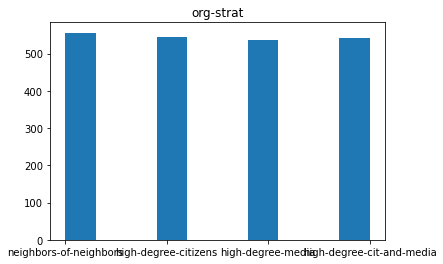

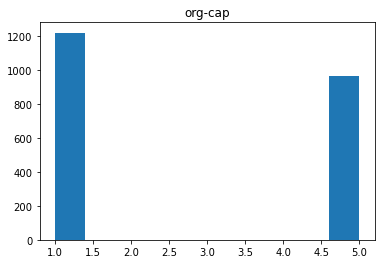

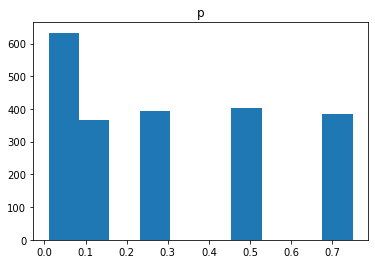

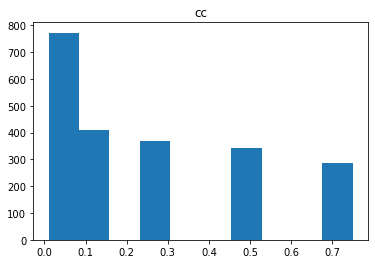

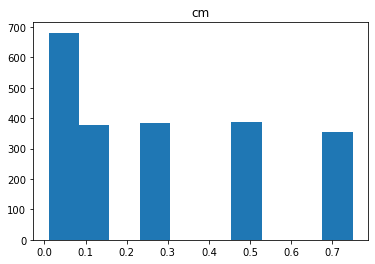

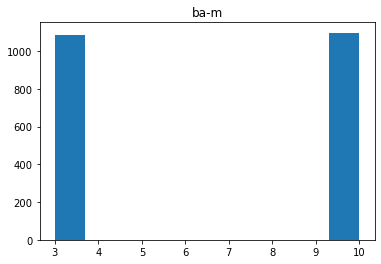

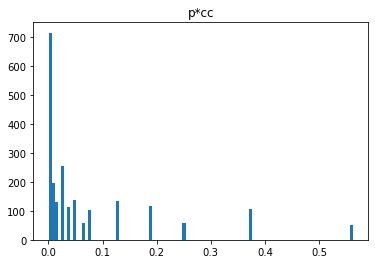

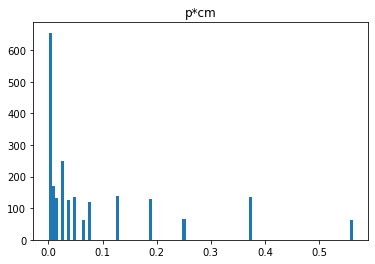

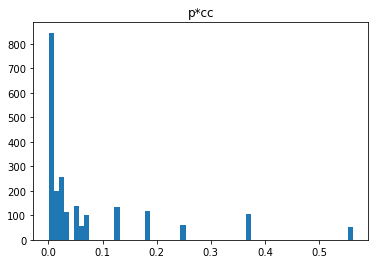

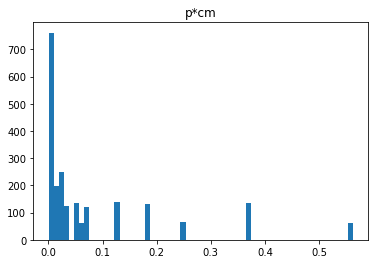

In [44]:
#Ugh- not a lot of evidence here- fails on more than half of the combinations

plt.hist(insig_df["flint-organizing-strategy"])
plt.title("org-strat")
plt.show()

plt.hist(insig_df["organizing-capacity"])
plt.title("org-cap")
plt.show()

plt.hist(insig_df["simple-spread-chance"])
plt.title("p")
plt.show()

plt.hist(insig_df["citizen-citizen-influence"])
plt.title("cc")
plt.show()

plt.hist(insig_df["citizen-media-influence"])
plt.title("cm")
plt.show()

plt.hist(insig_df["ba-m"])
plt.title("ba-m")
plt.show()

plt.hist(insig_df["p*cc"], bins = 100)
plt.title("p*cc")
plt.show()

plt.hist(insig_df["p*cm"], bins = 100)
plt.title("p*cm")
plt.show()

plt.hist(insig_df["p*cc"], bins = 60)
plt.title("p*cc")
plt.show()

plt.hist(insig_df["p*cm"], bins = 60)
plt.title("p*cm")
plt.show()

In [58]:
#the easiest way to look at sig/insig might be to add a column for this
print(ranksums_df)

      flint-organizing-strategy organizing-capacity  simple-spread-chance  \
0        neighbors-of-neighbors                   1                  0.01   
1        neighbors-of-neighbors                   1                  0.01   
2        neighbors-of-neighbors                   1                  0.01   
3        neighbors-of-neighbors                   1                  0.01   
4        neighbors-of-neighbors                   1                  0.01   
...                         ...                 ...                   ...   
3451  high-degree-cit-and-media                   5                  0.75   
3452  high-degree-cit-and-media                   5                  0.75   
3453  high-degree-cit-and-media                   5                  0.75   
3454  high-degree-cit-and-media                   5                  0.75   
3455  high-degree-cit-and-media                   5                  0.75   

      citizen-citizen-influence  citizen-media-influence ba-m  pvalue    p*

In [69]:
p_cc_count = ranksums_df.groupby("p*cc", as_index = False)["sig?"].count()
p_cc_sum = ranksums_df.groupby("p*cc", as_index = False)["sig?"].sum()
p_cc_combo = pd.merge(p_cc_count, p_cc_sum, left_index = True, right_index = True)
p_cm_count = ranksums_df.groupby("p*cm",as_index = False)["sig?"].count()
p_cm_sum = ranksums_df.groupby("p*cm",as_index = False)["sig?"].sum()
p_cm_combo = pd.merge(p_cm_count, p_cm_sum, left_index = True, right_index = True)

p_cc_combo["proportion"] = p_cc_combo["sig?_y"]/p_cc_combo["sig?_x"]
print(p_cc_combo)

p_cm_combo["proportion"] = p_cm_combo["sig?_y"]/p_cm_combo["sig?_x"]
print(p_cm_combo)

    p*cc_x  sig?_x  p*cc_y  sig?_y  proportion
0   0.0001      96  0.0001      73    0.760417
1   0.0005     192  0.0005      93    0.484375
2   0.0010     192  0.0010      66    0.343750
3   0.0025     192  0.0025      64    0.333333
4   0.0025      96  0.0025      24    0.250000
5   0.0050     192  0.0050      66    0.343750
6   0.0050     192  0.0050      51    0.265625
7   0.0075     192  0.0075      62    0.322917
8   0.0100      96  0.0100      29    0.302083
9   0.0125     192  0.0125      60    0.312500
10  0.0250     384  0.0250     128    0.333333
11  0.0375     192  0.0375      78    0.406250
12  0.0500     192  0.0500      53    0.276042
13  0.0625      96  0.0625      39    0.406250
14  0.0750     192  0.0750      90    0.468750
15  0.1250     192  0.1250      58    0.302083
16  0.1875     192  0.1875      74    0.385417
17  0.2500      96  0.2500      37    0.385417
18  0.3750     192  0.3750      85    0.442708
19  0.5625      96  0.5625      45    0.468750
    p*cm_x  s

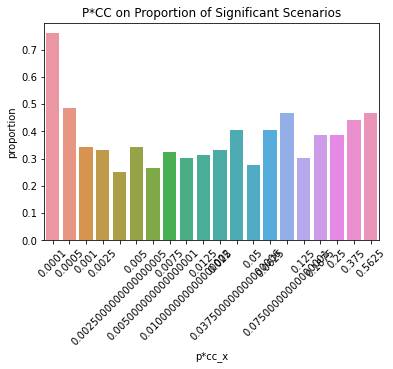

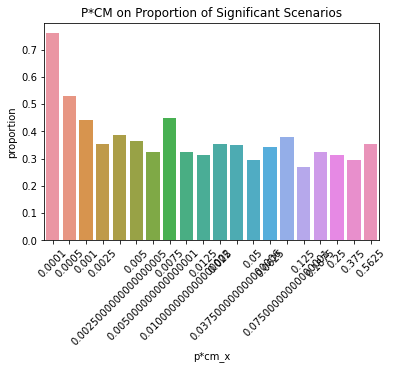

In [73]:
sns.barplot(data=p_cc_combo, x="p*cc_x",  y = "proportion")
plt.title("P*CC on Proportion of Significant Scenarios")
plt.xticks(rotation= 45)
plt.show()

sns.barplot(data=p_cm_combo, x="p*cm_x",  y = "proportion")
plt.title("P*CM on Proportion of Significant Scenarios")
plt.xticks(rotation = 45)
plt.show()

In [ ]:
#really hard to tell anything here- UGHHHHHHH
#what if we further limited our analysis to those scenarios that surpassed a threshold


In [83]:
#Let's Re-do the CDF so that it looks nice

#can we do a p-cc p-cm grid????
org_mod_df['p-cc'] = org_mod_df["simple-spread-chance"] * org_mod_df["citizen-citizen-influence"]
org_mod_df['p-cm'] = org_mod_df["simple-spread-chance"] * org_mod_df["citizen-media-influence"]
infl_mod_df["p-cm"] = infl_mod_df["simple-spread-chance"] * infl_mod_df['citizen-media-influence']
infl_mod_df["p-cc"] = infl_mod_df["simple-spread-chance"] * infl_mod_df['citizen-citizen-influence']

print(org_mod_df)

TypeError: cannot convert the series to <class 'float'>

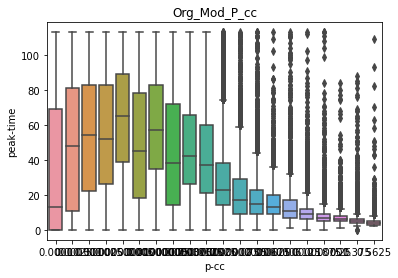

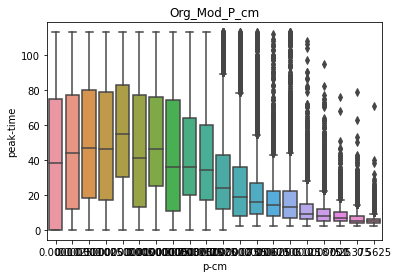

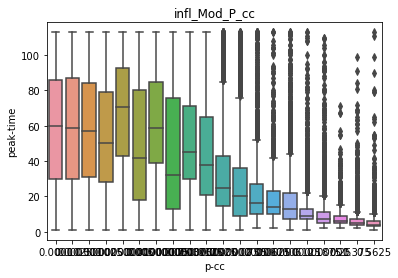

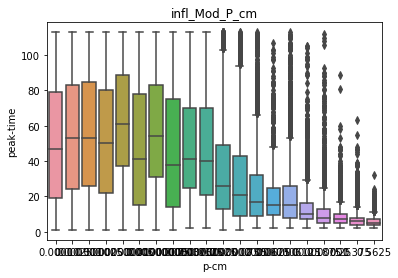

In [77]:
sns.boxplot(data= org_mod_df, y="peak-time", x="p-cc")
plt.title("Org_Mod_P_cc")
plt.show()

sns.boxplot(data= org_mod_df, y="peak-time", x="p-cm")
plt.title("Org_Mod_P_cm")
plt.show()

sns.boxplot(data= infl_mod_df, y="peak-time", x="p-cc")
plt.title("infl_Mod_P_cc")
plt.show()

sns.boxplot(data= infl_mod_df, y="peak-time", x="p-cm")
plt.title("infl_Mod_P_cm")
plt.show()

<Figure size 2160x720 with 0 Axes>

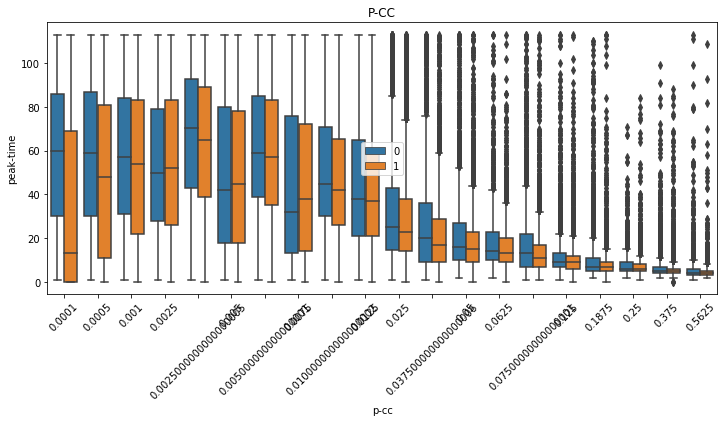

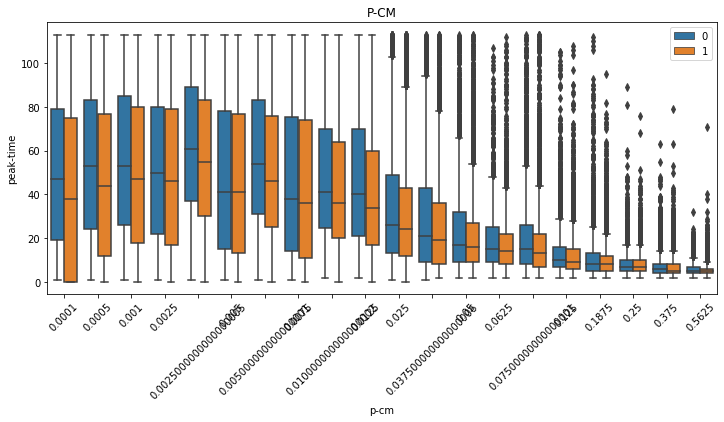

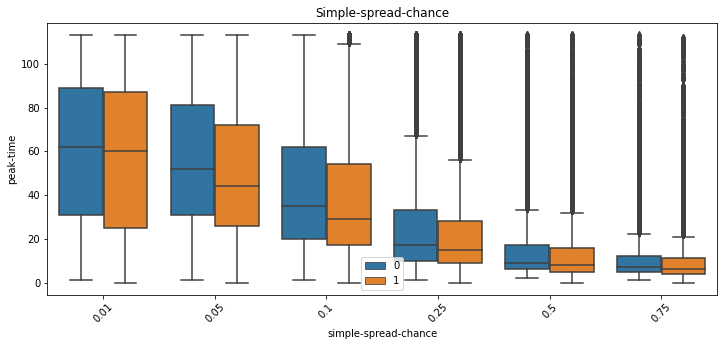

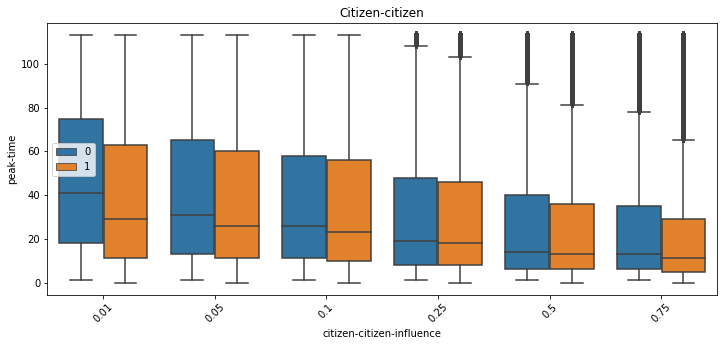

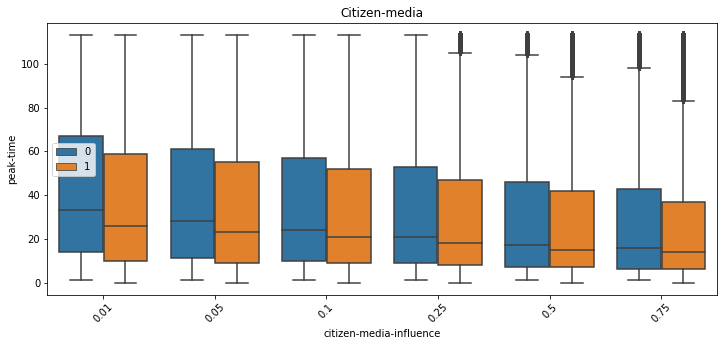

In [90]:
#what does the comparison look like?

plt.figure(figsize=(30,10))
org_mod_df["Organizing?"] = 1
infl_mod_df["Organizing?"] = 0
total_mod_df=org_mod_df.append(infl_mod_df)

plt.figure(figsize=(12,5))
sns.boxplot(data=total_mod_df, x="p-cc", y="peak-time", hue="Organizing?")
plt.xticks(rotation=45)
plt.legend()
plt.title("P-CC")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(data=total_mod_df, x="p-cm", y="peak-time", hue="Organizing?")
plt.xticks(rotation=45)
plt.legend()
plt.title("P-CM")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(data=total_mod_df, x="simple-spread-chance", y="peak-time", hue="Organizing?")
plt.xticks(rotation=45)
plt.legend()
plt.title("Simple-spread-chance")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(data=total_mod_df, x="citizen-citizen-influence", y="peak-time", hue="Organizing?")
plt.xticks(rotation=45)
plt.legend()
plt.title("Citizen-citizen")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(data=total_mod_df, x="citizen-media-influence", y="peak-time", hue="Organizing?")
plt.xticks(rotation=45)
plt.legend()
plt.title("Citizen-media")
plt.show()